#EDA - 1
#Title: Bike Details Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]

Saving BIKE DETAILS.csv to BIKE DETAILS.csv


In [ ]:
df = pd.read_csv('BIKE DETAILS.csv')

In [ ]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


1. What is the range of selling prices in the dataset

In [ ]:
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()

print("Minimum Selling Price:", min_price)
print("Maximum Selling Price:", max_price)

Minimum Selling Price: 5000
Maximum Selling Price: 760000


2. What is the median selling price for bikes in the dataset

In [ ]:
median_price = df['selling_price'].median()

In [ ]:
median_price

45000.0

3. What is the most common seller type

In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
df.dtypes

,0
name,object
selling_price,int64
year,int64
seller_type,object
owner,object
km_driven,int64
ex_showroom_price,float64


In [ ]:
df['seller_type'].value_counts()

,count
seller_type,
Individual,1055
Dealer,6


In [ ]:
commom_seller = df['seller_type'].mode()[0]

In [ ]:
commom_seller

'Individual'

In [ ]:
df['seller_type'].unique()

array(['Individual', 'Dealer'], dtype=object)

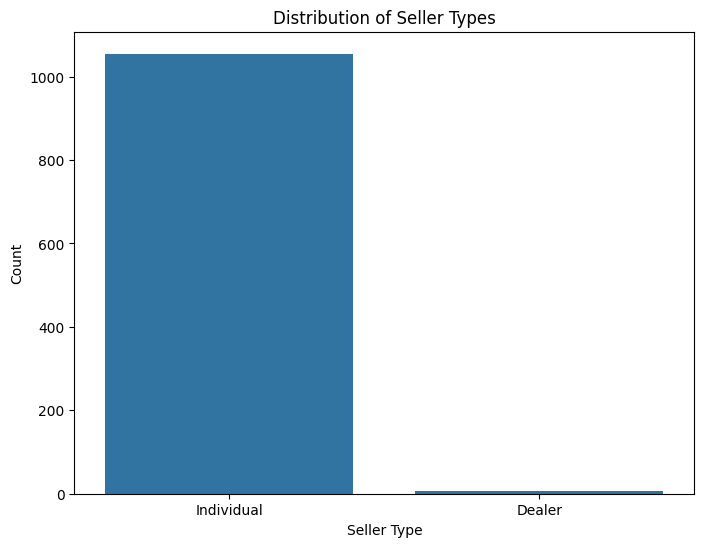

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='seller_type')
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.title('Distribution of Seller Types')
plt.show()

4. How many bikes have driven more than 50,000 kilometers

In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
df.km_driven

,km_driven
0,350
1,5650
2,12000
3,23000
4,21000
...,...
1056,500000
1057,33000
1058,35000
1059,53000


In [ ]:
bikes = df[df['km_driven'] > 5000]
count = bikes.shape[0]
print(f"Number of bikes with more than 50,000 kilometers: {count}")

Number of bikes with more than 50,000 kilometers: 976


5. What is the average km_driven value for each ownership type

In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
df['owner'].unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [ ]:
avg_km_driven = df.groupby('owner')['km_driven'].mean()

In [ ]:
avg_km_driven

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


6. What proportion of bikes are from the year 2015 or older

In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
total_bikes = df.shape[0]
older_bikes = df[df['year'] < 2015].shape[0]
proportion = older_bikes / total_bikes

In [ ]:
proportion

0.472196041470311

7. What is the trend of missing values across the dataset

In [ ]:
missing_values = df.isnull().sum()

In [ ]:
missing_values

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [ ]:
#missing_percentage = (missing_values / len(df))*100

In [ ]:
#df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace=True)

8. What is the highest ex_showroom_price recorded, and for which bike

In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
highest_price = df['ex_showroom_price'].max()

In [ ]:
highest_price

1278000.0

In [ ]:
highest_price_bike = df[df['ex_showroom_price'] == highest_price]

In [ ]:
highest_price_bike

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0


9. What is the total number of bikes listed by each seller type

In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
seller_counts = df['seller_type'].value_counts()

In [ ]:
seller_counts

,count
seller_type,
Individual,1055
Dealer,6


10. What is the relationship between selling_price and km_driven for first-owner bikes

In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
first_owner_bikes = df[df['owner'] == "1st owner"]

In [ ]:
first_owner_bikes

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
...,...,...,...,...,...,...,...
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
first_owner_bikes[['selling_price', 'km_driven']].isnull().sum()

,0
selling_price,0
km_driven,0


In [ ]:
corr = first_owner_bikes['selling_price'].corr(first_owner_bikes['km_driven'])

In [ ]:
corr

-0.2434817484496572

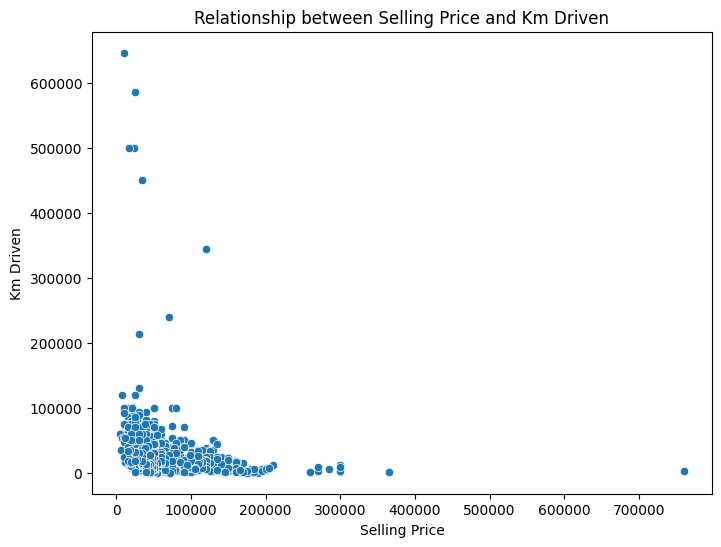

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=first_owner_bikes, x='selling_price', y='km_driven')
plt.xlabel('Selling Price')
plt.ylabel('Km Driven')
plt.title('Relationship between Selling Price and Km Driven')
plt.show()

11. Identify and remove outliers in the km_driven column using the IQR method

In [ ]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

IQR = Q3 - Q1

Lower_bound = Q1 -1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['km_driven'] < Lower_bound) | (df['km_driven'] > Upper_bound)]
df_cleaned = df[(df['km_driven'] >= Lower_bound) & (df['km_driven'] <= Upper_bound)]
print(f"Dataset after outlier removal: {df_cleaned.shape[0]} rows")

Dataset after outlier removal: 1022 rows


In [ ]:
outliers

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
91,Honda Activa [2000-2015],22989,2012,Individual,1st owner,500000,50267.0
93,Suzuki GS150R,30000,2010,Individual,1st owner,130000,70851.0
115,Hero Honda Passion Plus,7500,2004,Individual,1st owner,120000,NaN
135,Hero Honda CBZ extreme,20000,2007,Individual,1st owner,90000,NaN
154,Hero Xtreme Sports,22000,2014,Individual,1st owner,99000,78350.0
184,Honda CB Unicorn 160,75000,2015,Individual,1st owner,100000,79233.0
363,Hero Honda CD100SS,10000,1997,Individual,1st owner,646000,NaN
470,Honda Activa [2000-2015],23000,2009,Individual,1st owner,95000,50267.0
474,Hero Honda Passion PRO [2012],12000,2012,Individual,1st owner,90000,NaN
477,Honda Activa [2000-2015],25000,2009,Individual,1st owner,585659,50267.0


12. Perform a bivariate analysis to visualize the relationship between year and selling_price

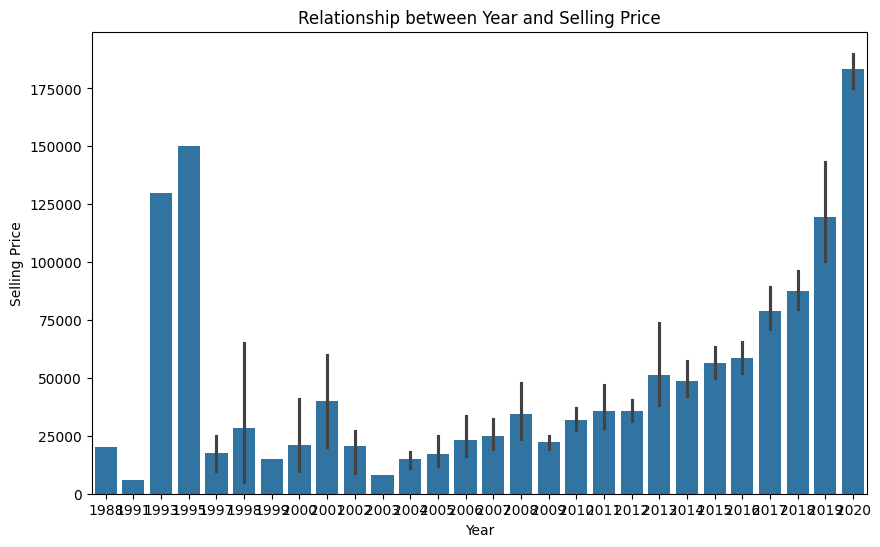

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='year', y='selling_price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Relationship between Year and Selling Price')
plt.show()


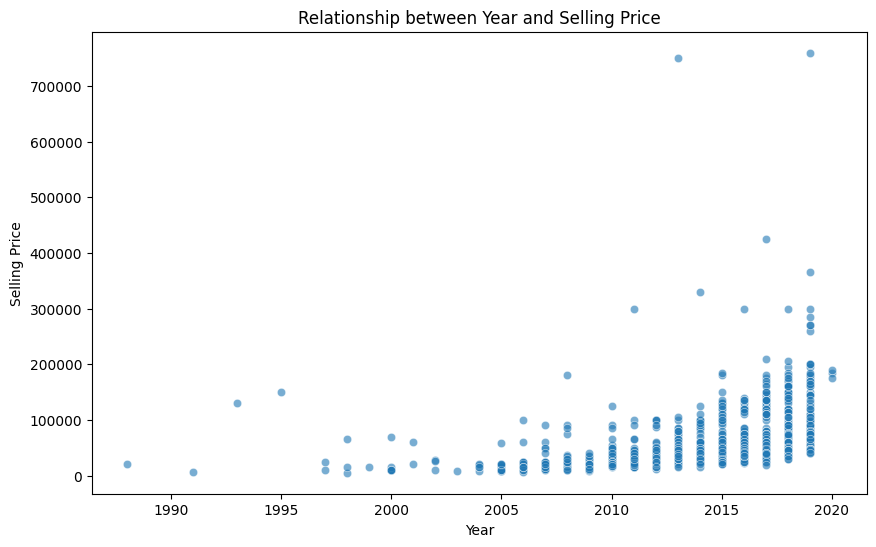

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x='year', y='selling_price', alpha =0.6)
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Relationship between Year and Selling Price')
plt.show()

13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)

In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
from datetime import datetime
current_year = datetime.now().year
df['bike_age'] = current_year - df['year']
print(df[["year", "bike_age", "selling_price"]].head())

avg_price_by_age = df.groupby('bike_age')['selling_price'].mean()




   year  bike_age  selling_price
0  2019         6         175000
1  2017         8          45000
2  2018         7         150000
3  2015        10          65000
4  2011        14          20000


In [ ]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df['bike_age'], df['selling_price'])
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

Slope: -5264.804840778512
Intercept: 118250.6633169423
R-squared: 0.16175550958904544
P-value: 1.613071930367684e-42
Standard Error: 368.2901551270023


14. Which bike names are priced significantly above the average price for their manufacturing year

In [ ]:
avg_price_per_year = df.groupby('year')['selling_price'].mean()

In [ ]:
avg_price_per_year

,selling_price
year,
1988,20000.000000
1991,6000.000000
1993,130000.000000
1995,150000.000000
1997,17500.000000
1998,28333.333333
1999,15000.000000
2000,20833.333333
2001,40000.000000


In [ ]:
import pandas as pd

df = pd.read_csv('BIKE DETAILS.csv')

df.columns = df.columns.str.strip().str.lower()

average_prices = df.groupby('year')['selling_price'].mean()

std_prices = df.groupby('year')['selling_price'].std()

df = df.merge(average_prices.rename('avg_price'), on='year')
df = df.merge(std_prices.rename('std_price'), on='year')

significantly_above_avg = df[df['selling_price'] > df['avg_price'] + df['std_price']]

result = significantly_above_avg[['name', 'year', 'selling_price', 'avg_price', 'std_price']]

print("Bikes priced significantly above the average price for their manufacturing year:")
print(result)




Bikes priced significantly above the average price for their manufacturing year:
                                     name  year  selling_price      avg_price  \
2     Royal Enfield Classic Gunmetal Grey  2018         150000   87660.374046   
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   34289.285714   
13                          Yamaha YZF R3  2019         365000  119689.511628   
18    Royal Enfield Classic Gunmetal Grey  2018         150000   87660.374046   
24          Royal Enfield Thunderbird 350  2016         110000   58469.018692   
..                                    ...   ...            ...            ...   
976             Royal Enfield Classic 350  2015         110000   56500.000000   
979             Royal Enfield Thunder 500  2015         105000   56500.000000   
983             Royal Enfield Classic 350  2015         100000   56500.000000   
984             Royal Enfield Classic 500  2014          95000   48668.131868   
985             Royal Enfiel

15. Develop a correlation matrix for numeric columns and visualize it using a heatmap

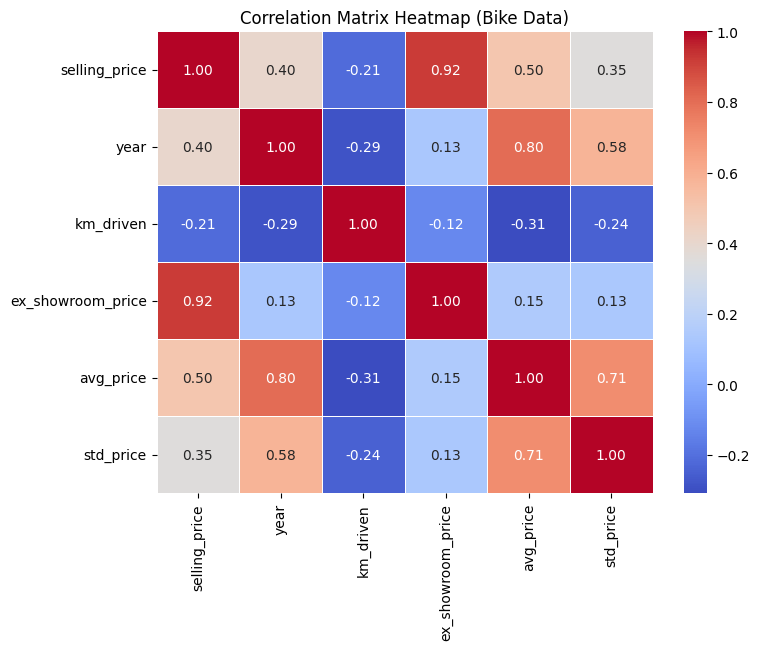

In [ ]:
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Bike Data)")
plt.show()

#EDA - 2
#Title: Car Sale Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]

Saving Car Sale.csv to Car Sale.csv


In [ ]:
df1 = pd.read_csv('Car Sale.csv')

In [ ]:
df1

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [ ]:
df1.dtypes

,0
Car_id,object
Date,object
Customer Name,object
Gender,object
Annual Income,int64
Dealer_Name,object
Company,object
Model,object
Engine,object
Transmission,object


1. What is the average selling price of cars for each dealer, and how does it compare across different dealers

In [ ]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
avg_price = df1.groupby("Dealer_Name")['Price ($)'].mean().reset_index()

avg_price.rename(columns={"Price ($)": "Avg_selling_price"}, inplace=True)

print(avg_price.sort_values(by="Avg_selling_price", ascending = False).head(10))

                          Dealer_Name  Avg_selling_price
27                          U-Haul CO       28769.919006
5                       Classic Chevy       28602.014446
19               Rabun Used Car Sales       28527.536177
11                    Iceberg Rentals       28522.958533
8               Enterprise Rent A Car       28312.580800
23  Scrivener Performance Engineering       28297.371589
9          Gartner Buick Hyundai Saab       28247.621019
22                   Saab-Belle Dodge       28190.139888
2                         Capitol KIA       28189.703822
20                      Race Car Help       28163.372706


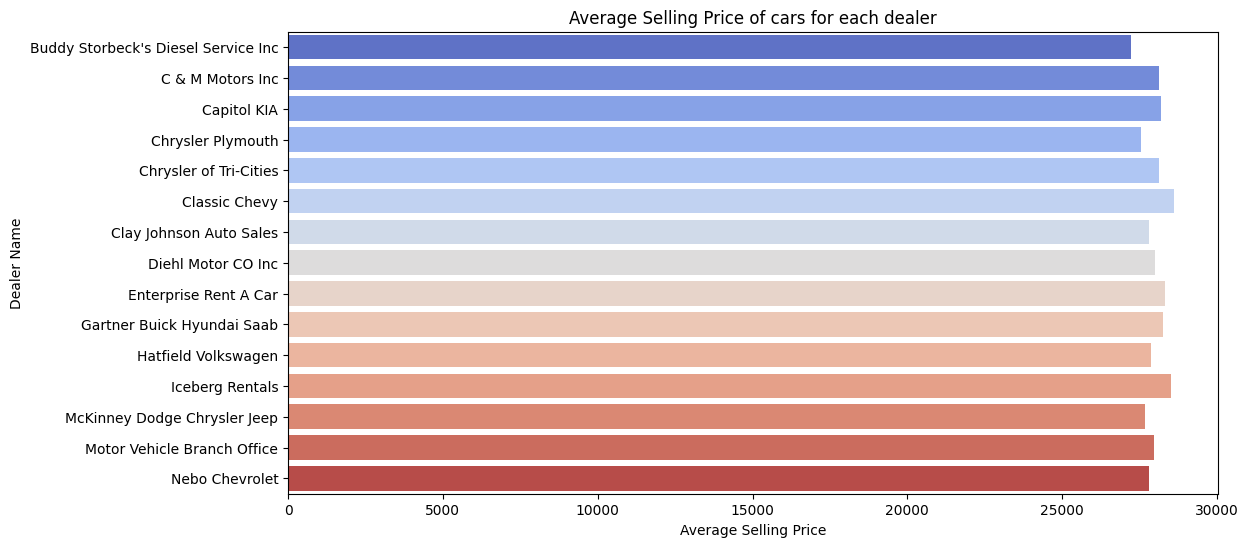

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Avg_selling_price", y='Dealer_Name', data=avg_price.head(15), palette='coolwarm')
plt.xlabel('Average Selling Price')
plt.ylabel('Dealer Name')
plt.title('Average Selling Price of cars for each dealer')
plt.show()


2.  Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends

In [ ]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
price_variation = df1.groupby('Company')['Price ($)'].std().reset_index()
price_variation.rename(columns={'Price ($)': 'price_StdDev'}, inplace = True)
price_variation = price_variation.sort_values(by='price_StdDev', ascending=False)
print(price_variation.head(10))

     Company  price_StdDev
15   Lincoln  19658.050211
24      Saab  19653.740089
4   Cadillac  19517.120220
21  Plymouth  19065.997338
14     Lexus  17852.923492
3      Buick  17142.232626
17   Mercury  16445.172195
19    Nissan  16214.264017
25    Saturn  15990.223671
8       Ford  15849.090227


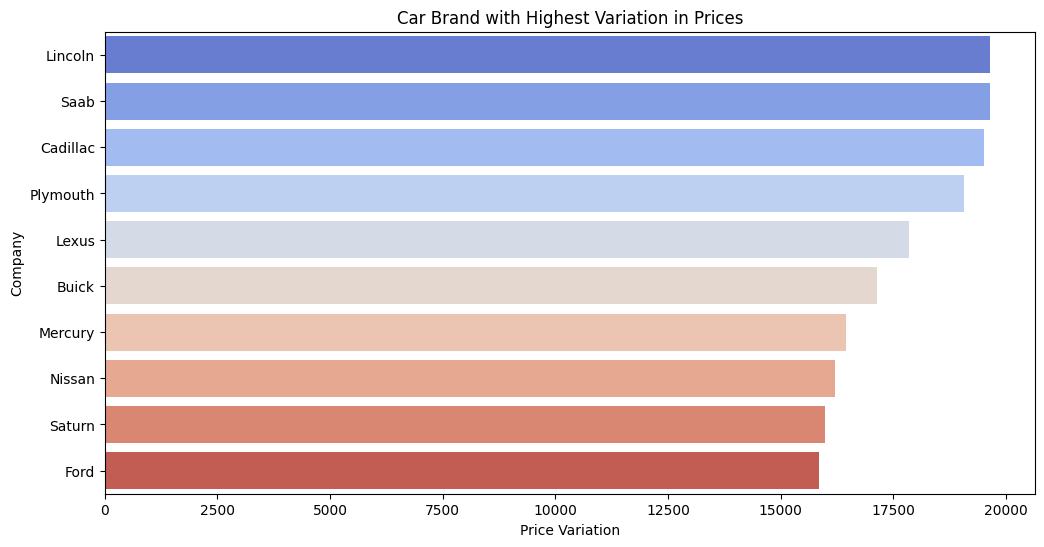

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='price_StdDev', y='Company', data=price_variation.head(10), palette='coolwarm')
plt.xlabel('Price Variation')
plt.ylabel('Company')
plt.title('Car Brand with Highest Variation in Prices')
plt.show()

3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

In [ ]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
df1['Transmission'].unique()

array(['Auto', 'Manual'], dtype=object)

In [ ]:
price_summary = df1.groupby('Transmission')['Price ($)'].describe()

In [ ]:
price_summary

,count,mean,std,min,25%,50%,75%,max
Transmission,,,,,,,,
Auto,12571.0,28248.525972,13747.070597,1200.0,19000.0,24000.0,35500.0,75700.0
Manual,11335.0,27914.710631,15862.871978,1700.0,17000.0,22001.0,34000.0,85800.0


In [ ]:
price_summary["IQR"] = price_summary["75%"] - price_summary["25%"]
print(price_summary[["count","min", "25%", "50%", "75%", "max", "IQR"]])

                count     min      25%      50%      75%      max      IQR
Transmission                                                              
Auto          12571.0  1200.0  19000.0  24000.0  35500.0  75700.0  16500.0
Manual        11335.0  1700.0  17000.0  22001.0  34000.0  85800.0  17000.0


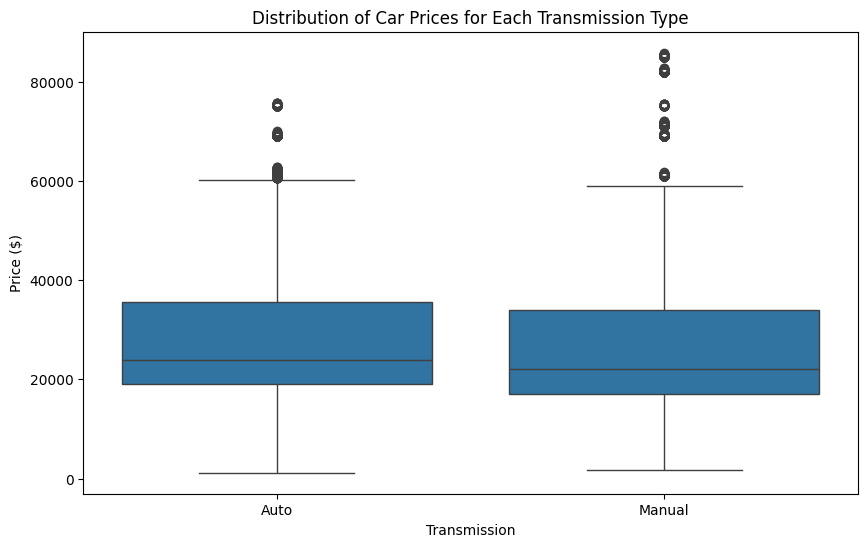

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df1, x='Transmission', y='Price ($)')
plt.xlabel('Transmission')
plt.ylabel('Price ($)')
plt.title('Distribution of Car Prices for Each Transmission Type')
plt.show()

4.  What is the distribution of car prices across different regions

In [ ]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
df1['Dealer_Region'].unique()

array(['Middletown', 'Aurora', 'Greenville', 'Pasco', 'Janesville',
       'Scottsdale', 'Austin'], dtype=object)

In [ ]:
region_price_distribution = df1.groupby('Dealer_Region')['Price ($)'].describe()

In [ ]:
region_price_distribution

,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,3130.0,28334.626837,15026.207252,9000.0,18001.0,23000.0,35000.0,85800.0
Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0
Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0


In [ ]:
region_price_distribution["IQR"]= region_price_distribution["75%"] - region_price_distribution["25%"]
region_price_distribution [["count","min", "25%", "50%", "75%", "max", "IQR"]]

,count,min,25%,50%,75%,max,IQR
Dealer_Region,,,,,,,
Aurora,3130.0,9000.0,18001.0,23000.0,35000.0,85800.0,16999.0
Austin,4135.0,9000.0,18001.0,23801.0,35001.0,85601.0,17000.0
Greenville,3128.0,1200.0,18001.0,22500.0,34500.0,85200.0,16499.0
Janesville,3821.0,4300.0,18001.0,23000.0,34000.0,85400.0,15999.0
Middletown,3128.0,1700.0,18000.0,22750.0,34000.0,85300.0,16000.0
Pasco,3131.0,9000.0,18500.5,23000.0,34000.0,85600.0,15499.5
Scottsdale,3433.0,1450.0,18000.0,22600.0,33500.0,85001.0,15500.0


5. What is the distribution of cars based on body styles

In [ ]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
df1['Body Style'].unique()

array(['SUV', 'Passenger', 'Hatchback', 'Hardtop', 'Sedan'], dtype=object)

In [ ]:
styles = df1['Body Style'].value_counts()

In [ ]:
styles

,count
Body Style,
SUV,6374
Hatchback,6128
Sedan,4488
Passenger,3945
Hardtop,2971


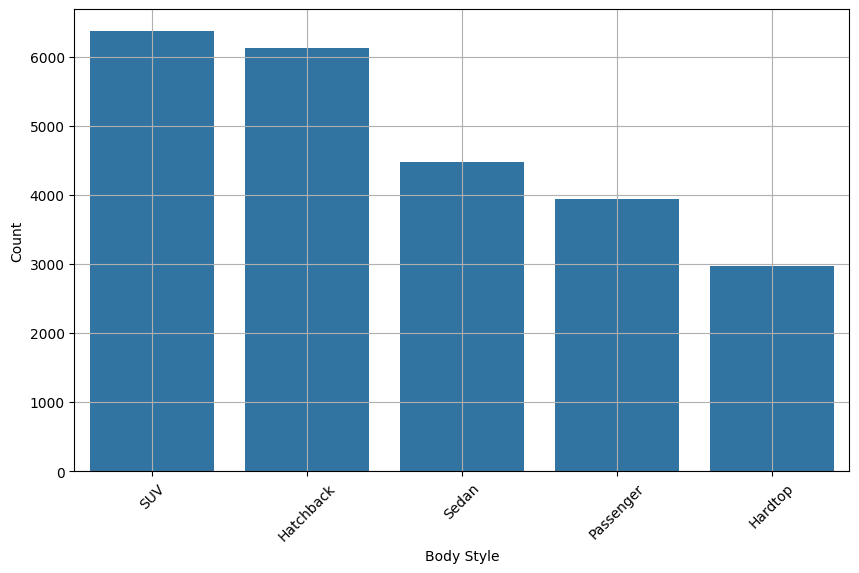

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=styles.index, y=styles.values)
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid()
plt.show()

6. How does the average selling price of cars vary by customer gender and annual income

In [ ]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
df1['Annual Income'] = pd.to_numeric(df1['Annual Income'], errors='coerce')
df1['Price ($)'] = pd.to_numeric(df1['Price ($)'], errors='coerce')
df1.dropna(subset=['Gender', 'Annual Income', 'Price ($)'])

avg_price_by_gender = df1.groupby('Gender')['Price ($)'].mean().reset_index()


In [ ]:

avg_price_by_gender

,Gender,Price ($)
0,Female,28277.265270
1,Male,28039.429407


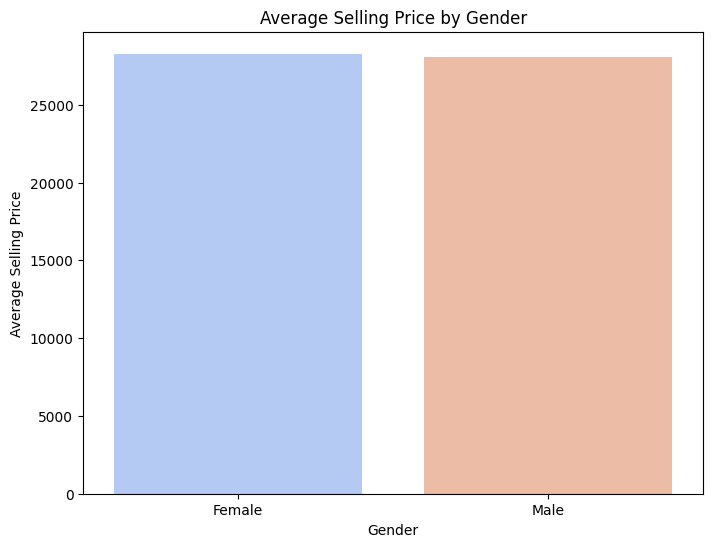

In [ ]:
#Average selling price by Gender
plt.figure(figsize=(8,6))
sns.barplot(x='Gender', y='Price ($)', data=avg_price_by_gender, palette='coolwarm')
plt.xlabel('Gender')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Gender')
plt.show()

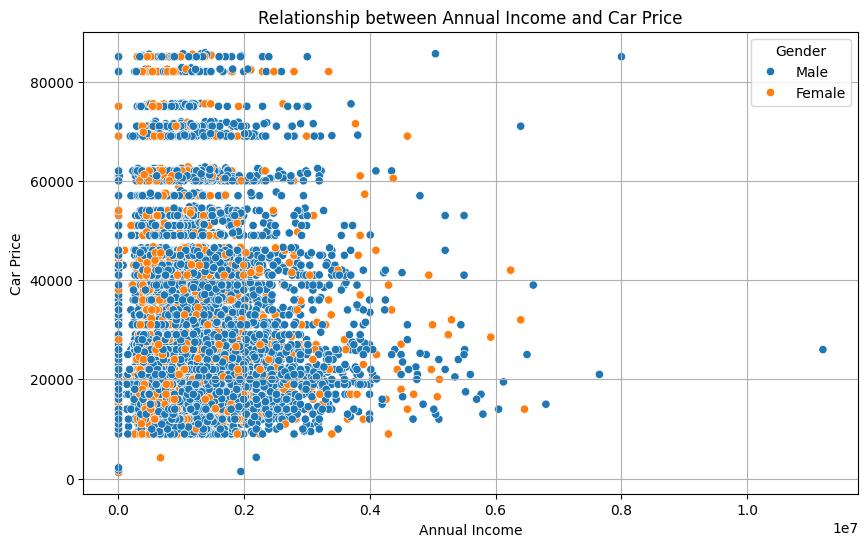

In [ ]:
#Relationship between annual income and car price

plt.figure(figsize=(10,6))
sns.scatterplot(data=df1, x='Annual Income', y='Price ($)', hue='Gender')
plt.xlabel('Annual Income')
plt.ylabel('Car Price')
plt.title('Relationship between Annual Income and Car Price')
plt.grid()
plt.show()


7. What is the distribution of car prices by region, and how does the number of cars sold vary by region

In [ ]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
df1['Price ($)'] = pd.to_numeric(df1['Price ($)'], errors='coerce')
df1.dropna(subset=['Dealer_Region', 'Price ($)'])
price_summary = df1.groupby('Dealer_Region')['Price ($)'].describe()
price_summary[["count","min", "25%", "50%", "75%", "max"]]

,count,min,25%,50%,75%,max
Dealer_Region,,,,,,
Aurora,3130.0,9000.0,18001.0,23000.0,35000.0,85800.0
Austin,4135.0,9000.0,18001.0,23801.0,35001.0,85601.0
Greenville,3128.0,1200.0,18001.0,22500.0,34500.0,85200.0
Janesville,3821.0,4300.0,18001.0,23000.0,34000.0,85400.0
Middletown,3128.0,1700.0,18000.0,22750.0,34000.0,85300.0
Pasco,3131.0,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,1450.0,18000.0,22600.0,33500.0,85001.0


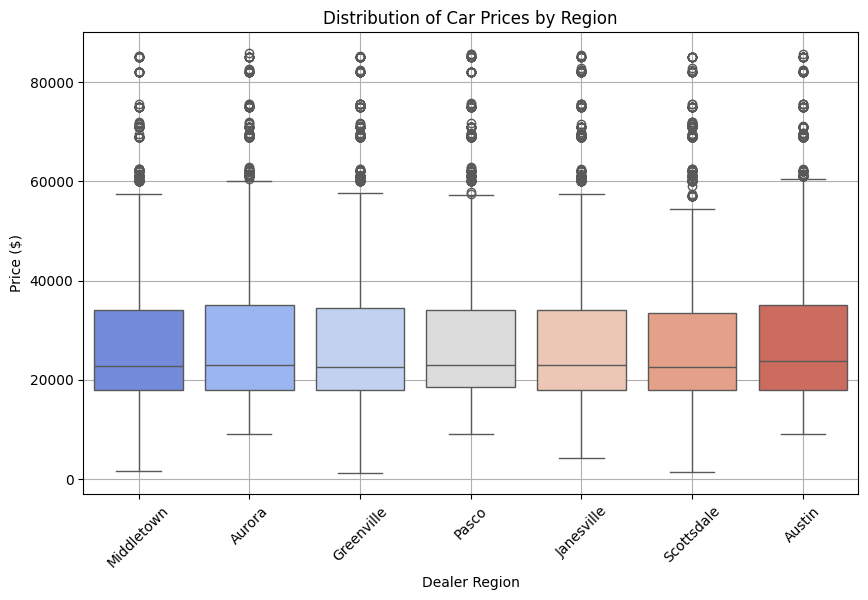

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df1, x='Dealer_Region', y='Price ($)', palette='coolwarm')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.title('Distribution of Car Prices by Region')
plt.xticks(rotation= 45)
plt.grid()
plt.show()

8. How does the average car price differ between cars with different engine sizes

In [ ]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
df1['Engine'].unique()

array(['DoubleÂ\xa0Overhead Camshaft', 'Overhead Camshaft'], dtype=object)

      Engine  Engine_Size
0     149 cc       149.00
1  109.51 cc       109.51
2   199.5 cc       199.50
3   124.7 cc       124.70
4     153 cc       153.00
5     125 cc       125.00
6     110 cc       110.00
7     135 cc       135.00
8     120 cc       120.00
9     149 cc       149.00
   Engine_Size  Price ($)
0       109.51    45000.0
1       110.00    16000.0
2       120.00    12000.0
3       124.70    65000.0
4       125.00    17000.0
5       135.00    15000.0
6       149.00    13750.0
7       153.00    20000.0
8       199.50   150000.0


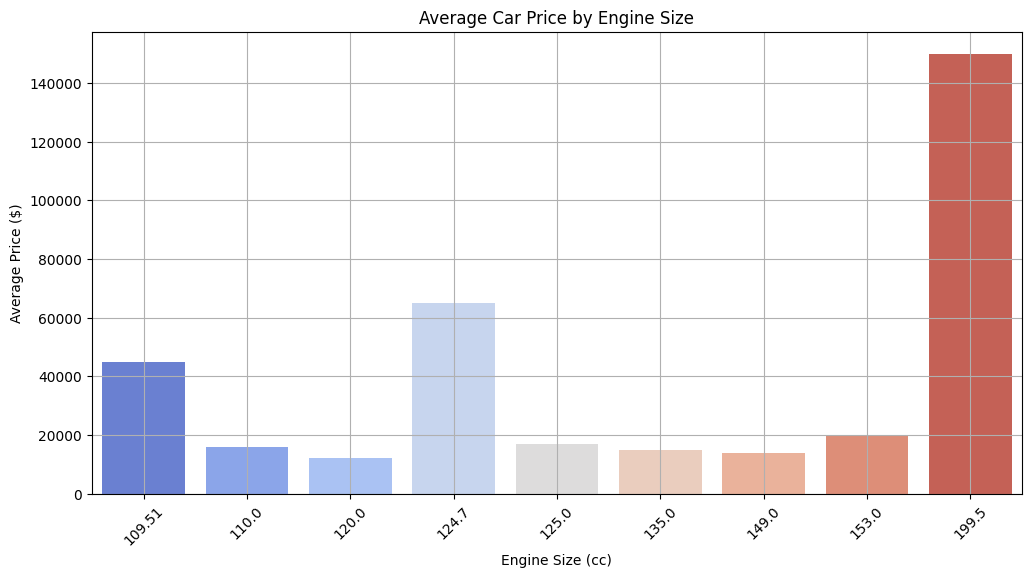

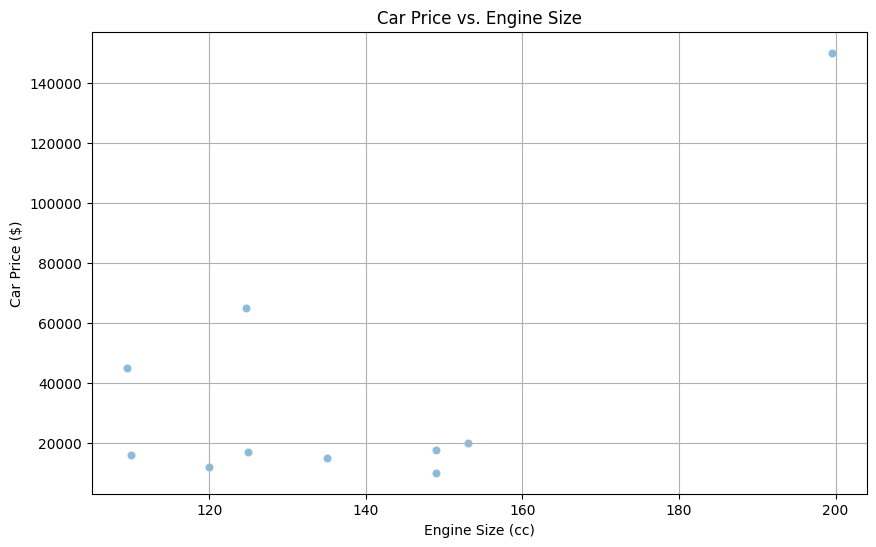

In [ ]:
data = {
    "Price ($)": [17500, 45000, 150000, 65000, 20000, 17000, 16000, 15000, 12000, 10000],
    "Engine": ["149 cc", "109.51 cc", "199.5 cc", "124.7 cc", "153 cc", "125 cc", "110 cc", "135 cc", "120 cc", "149 cc"]
}

df1 = pd.DataFrame(data)


df1["Price ($)"] = pd.to_numeric(df1["Price ($)"], errors="coerce")
#df1 = df1.dropna(subset=["Price ($)", "Engine"])

def extract_engine_size(engine):
    if isinstance(engine, str):
        match = re.search(r"(\d+\.?\d*)", engine)  # Extract first number with decimal
        return float(match.group(0)) if match else None
    return None

df1["Engine_Size"] = df1["Engine"].apply(extract_engine_size)
#df1 = df1.dropna(subset=["Engine_Size"])
df1["Engine_Size"] = df1["Engine_Size"].astype(float)


print(df1[["Engine", "Engine_Size"]].head(10))


avg_price_by_engine = df1.groupby("Engine_Size")["Price ($)"].mean().reset_index()


print(avg_price_by_engine.head(10))

# Bar Chart: Average Car Price by Engine Size
plt.figure(figsize=(12,6))
sns.barplot(x="Engine_Size", y="Price ($)", data=avg_price_by_engine, palette="coolwarm")

plt.title("Average Car Price by Engine Size")
plt.xlabel("Engine Size (cc)")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Scatter Plot: Engine Size vs. Car Price
plt.figure(figsize=(10,6))
sns.scatterplot(x=df1["Engine_Size"], y=df1["Price ($)"], alpha=0.5)

plt.title("Car Price vs. Engine Size")
plt.xlabel("Engine Size (cc)")
plt.ylabel("Car Price ($)")
plt.grid()
plt.show()


9.  How do car prices vary based on the customer’s annual income bracket?

In [ ]:
df1.columns

Index(['Price ($)', 'Engine', 'Engine_Size'], dtype='object')

In [ ]:
car_sales_df["Annual Income"] = pd.to_numeric(car_sales_df["Annual Income"], errors="coerce")
car_sales_df["Price ($)"] = pd.to_numeric(car_sales_df["Price ($)"], errors="coerce")

car_sales_df = car_sales_df.dropna(subset=["Annual Income", "Price ($)"])

income_bins = [0, 30000, 60000, 100000, 200000, 500000, 1000000, car_sales_df["Annual Income"].max()]
income_labels = ["Low Income", "Lower Middle", "Middle", "Upper Middle", "High Income", "Very High Income", "Ultra Rich"]

car_sales_df["Income Bracket"] = pd.cut(car_sales_df["Annual Income"], bins=income_bins, labels=income_labels, right=False)

avg_price_by_income = car_sales_df.groupby("Income Bracket")["Price ($)"].mean().reset_index()

avg_price_by_income

,Income Bracket,Price ($)
0,Low Income,27884.297820
1,Lower Middle,NaN
2,Middle,43000.000000
3,Upper Middle,19536.071429
4,High Income,28565.490421
5,Very High Income,27987.008477
6,Ultra Rich,28235.348958


from matplotlib import pyplot as plt
avg_price_by_income['Price ($)'].plot(kind='hist', bins=20, title='Price ($)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
avg_price_by_income['Price ($)'].plot(kind='line', figsize=(8, 4), title='Price ($)')
plt.gca().spines[['top', 'right']].set_visible(False)

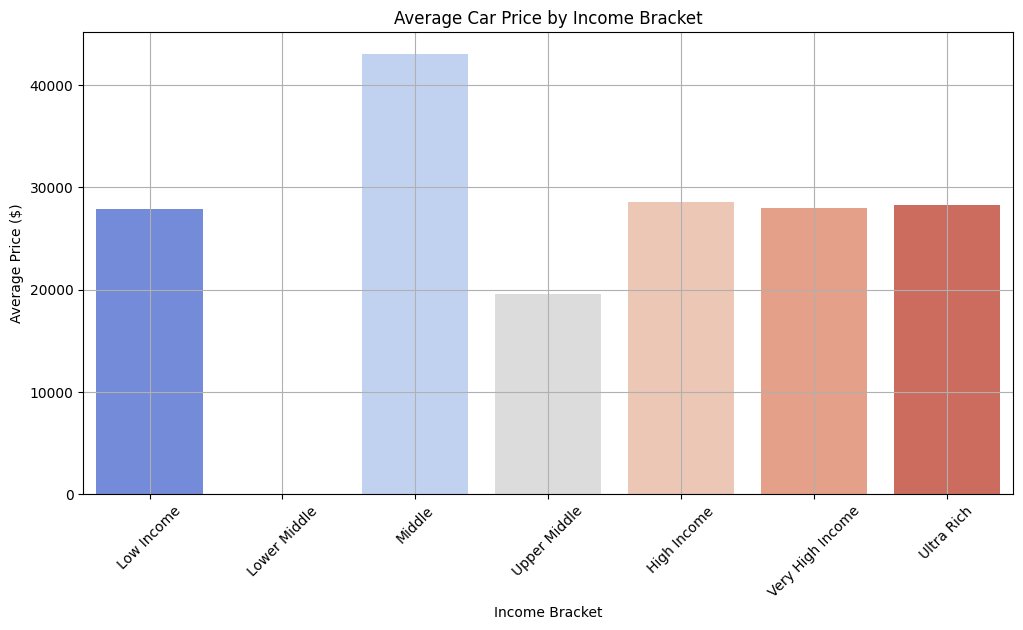

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="Income Bracket", y="Price ($)", data=avg_price_by_income, palette="coolwarm")
plt.title("Average Car Price by Income Bracket")
plt.xlabel("Income Bracket")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

In [ ]:
top_models = car_sales_df["Model"].value_counts().head(5)
top_models

,count
Model,
Diamante,418
Silhouette,411
Prizm,411
Passat,391
Ram Pickup,383


In [ ]:
top_models_names = top_models.index.tolist()
top_models_df = car_sales_df[car_sales_df["Model"].isin(top_models_names)]
top_models_names

['Diamante', 'Silhouette', 'Prizm', 'Passat', 'Ram Pickup']

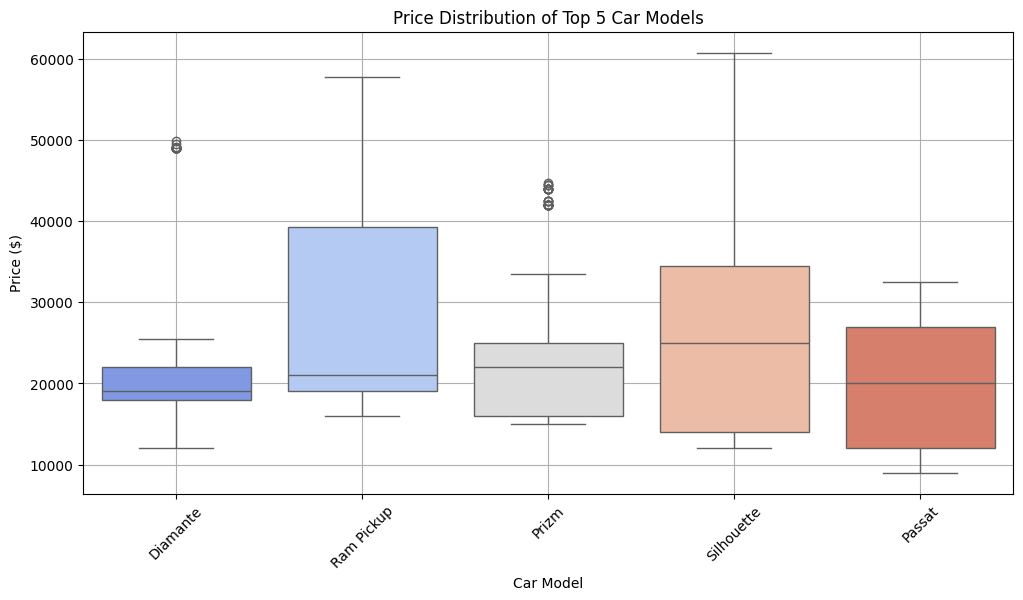

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Model", y="Price ($)", data=top_models_df, palette="coolwarm")
plt.title("Price Distribution of Top 5 Car Models")
plt.xlabel("Car Model")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

In [ ]:
df1 = pd.read_csv('Car Sale.csv')

In [ ]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:

df1["Price ($)"] = pd.to_numeric(df1["Price ($)"], errors="coerce")
df1 = df1.dropna(subset=["Price ($)", "Engine", "Color"])

def extract_engine_size(engine):
    if isinstance(engine, str):
        match = re.search(r"(\d+)", engine)
        return int(match.group(0)) if match else None
    return None

df1["Engine_Size"] = df1["Engine"].apply(extract_engine_size)
df1 = df1.dropna(subset=["Engine_Size"])
df1["Engine_Size"] = df1["Engine_Size"].astype(int)


print(df1[["Engine", "Engine_Size"]].head(10))


price_variation_by_color = df1.groupby("Color")["Price ($)"].std().reset_index()

print(price_variation_by_color.head(10))



Empty DataFrame
Columns: [Engine, Engine_Size]
Index: []
Empty DataFrame
Columns: [Color, Price ($)]
Index: []


In [ ]:
df1 = df1.dropna(subset=["Engine_Size", "Price ($)", "Color"])

# Convert Engine_Size and Price to numeric if needed
df1["Price ($)"] = pd.to_numeric(df1["Price ($)"], errors="coerce")
df1["Engine_Size"] = pd.to_numeric(df1["Engine_Size"], errors="coerce")

# Drop missing values again to be safe
df1 = df1.dropna(subset=["Engine_Size", "Price ($)", "Color"])

# 🔍 Debugging: Final Check Before Plotting
print("Shape of df1:", df1.shape)
print(df1.dtypes)
print(df1.head())



Shape of df1: (0, 17)
Car_id           object
Date             object
Customer Name    object
Gender           object
Annual Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price ($)         int64
Dealer_No        object
Body Style       object
Phone             int64
Dealer_Region    object
Engine_Size       int64
dtype: object
Empty DataFrame
Columns: [Car_id, Date, Customer Name, Gender, Annual Income, Dealer_Name, Company, Model, Engine, Transmission, Color, Price ($), Dealer_No , Body Style, Phone, Dealer_Region, Engine_Size]
Index: []


In [ ]:
df1["Price ($)"] = pd.to_numeric(df1["Price ($)"], errors="coerce")


import re
def extract_engine_size(engine):
    if isinstance(engine, str):
        match = re.search(r"(\d+)", engine)
        return int(match.group(0)) if match else None
    return None

df1["Engine_Size"] = df1["Engine"].apply(extract_engine_size)

df1 = df1.dropna(subset=["Engine_Size", "Price ($)", "Color"])


df1["Engine_Size"] = df1["Engine_Size"].astype(int)

# 1️⃣ Find Color with the Highest Price Variation
price_variation = df1.groupby("Color")["Price ($)"].std().reset_index()
price_variation.rename(columns={"Price ($)": "Price_StdDev"}, inplace=True)
highest_price_var_color = price_variation.sort_values(by="Price_StdDev", ascending=False).head(1)

# 2️⃣ Find Color with the Highest Engine Size Variation
engine_variation = df1.groupby("Color")["Engine_Size"].std().reset_index()
engine_variation.rename(columns={"Engine_Size": "Engine_StdDev"}, inplace=True)
highest_engine_var_color = engine_variation.sort_values(by="Engine_StdDev", ascending=False).head(1)

# Display top color variations
print("🚗 Color with Highest Price Variation:\n", highest_price_var_color)
print("🔧 Color with Highest Engine Size Variation:\n", highest_engine_var_color)



🚗 Color with Highest Price Variation:
 Empty DataFrame
Columns: [Color, Price_StdDev]
Index: []
🔧 Color with Highest Engine Size Variation:
 Empty DataFrame
Columns: [Color, Engine_StdDev]
Index: []


12.  Is there any seasonal trend in car sales based on the date of sale?

In [ ]:
df1 = pd.read_csv('Car Sale.csv')

In [ ]:
df1.columns


Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')
df1['year'] = df1['Date'].dt.year
df1['month'] = df1['Date'].dt.month
df1['day'] = df1['Date'].dt.day
df1['month_name'] = df1['Date'].dt.strftime('%B')

monthly_sales = df1.groupby('month_name')['Car_id'].count().reset_index()

month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

monthly_sales['month_name'] = pd.Categorical(monthly_sales['month_name'], categories=month_order, ordered=True)

monthly_sales = monthly_sales.sort_values('month_name')


In [ ]:

monthly_sales

,month_name,Car_id
4,January,790
3,February,735
7,March,1535
0,April,1655
8,May,1895
6,June,1715
5,July,1725
1,August,1705
11,September,3305
10,October,1830


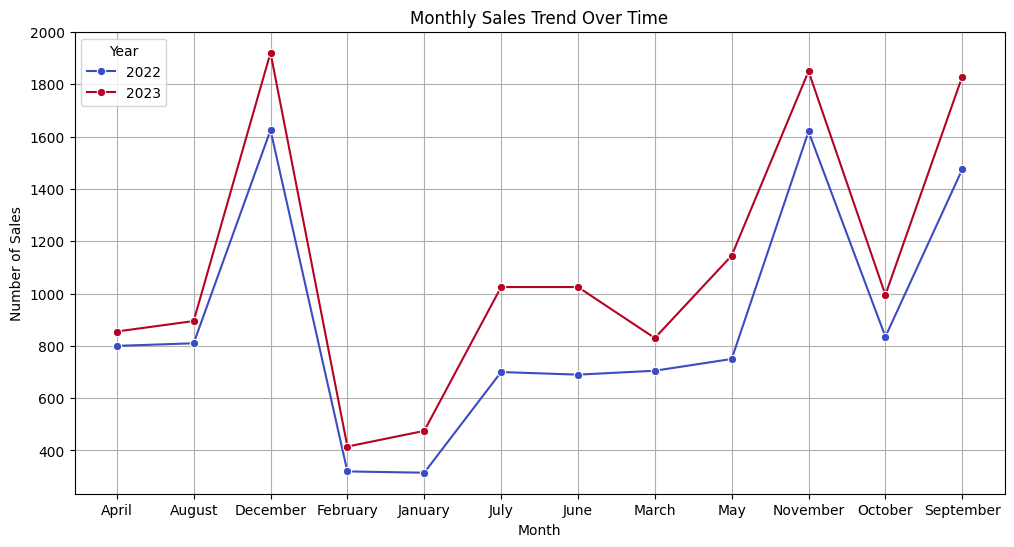

In [ ]:
monthly_sales_by_year = df1.groupby(['year', 'month_name'])['Car_id'].count().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_name', y='Car_id', hue='year', data=monthly_sales_by_year, palette='coolwarm', marker='o')

plt.title('Monthly Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.legend(title='Year')
plt.grid(True)
plt.show()

13. How does the car price distribution change when considering different combinations of body style and transmission type?

In [ ]:
df1 = pd.read_csv('Car Sale.csv')

In [ ]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
df1['Price ($)'] = pd.to_numeric(df1['Price ($)'], errors = 'coerce')
df1 = df1.dropna(subset=['Body Style', 'Transmission', 'Price ($)'])
price_summary = df1.groupby(['Body Style', 'Transmission'])['Price ($)'].describe()
price_summary[["count", "min", "25%", "50%", "75%", "max"]]

count      min      25%      50%      75%      max
Body Style Transmission                                                     
Hardtop    Auto          1408.0  12000.0  21001.0  27000.0  43125.0  75501.0
           Manual        1563.0  11000.0  17575.5  22001.0  29000.0  82500.0
Hatchback  Auto          3458.0   4200.0  18001.0  21500.0  31000.0  75700.0
           Manual        2670.0   1700.0  17000.0  23000.0  36001.0  85600.0
Passenger  Auto          2020.0   9000.0  19000.0  25000.0  38000.0  69801.0
           Manual        1925.0  10000.0  16001.0  22000.0  37000.0  85800.0
SUV        Auto          3086.0   1200.0  19000.0  25000.0  33000.0  75501.0
           Manual        3288.0   2200.0  17000.0  22000.0  28000.0  85500.0
Sedan      Auto          2599.0  12000.0  19000.0  26000.0  39500.0  69980.0
           Manual        1889.0  11000.0  19001.0  25000.0  36600.0  69700.0

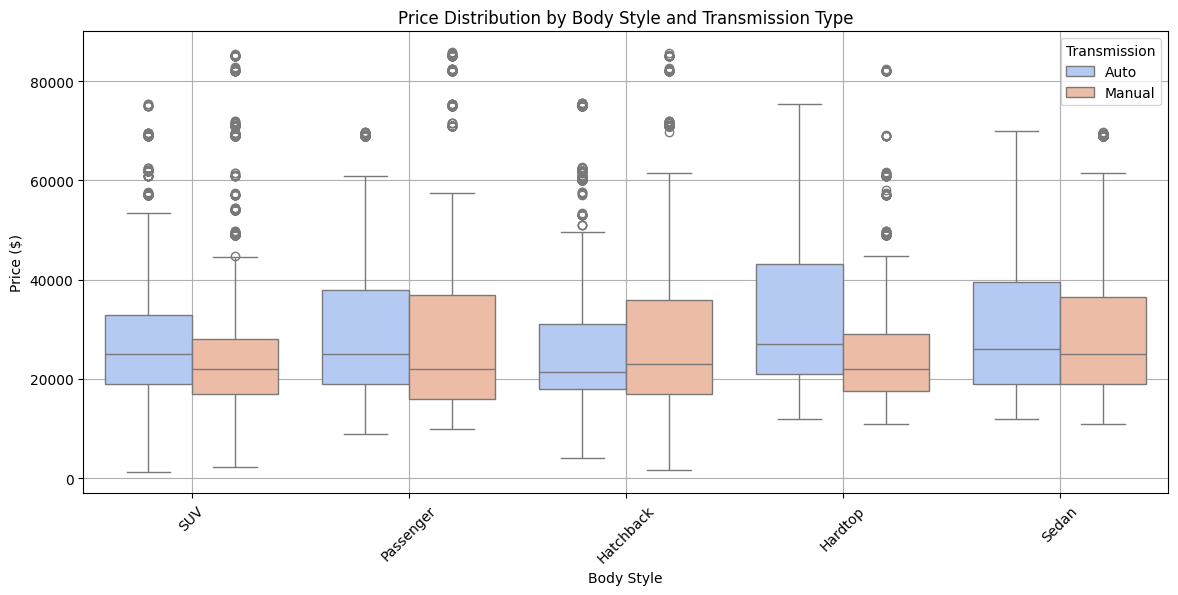

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df1, x='Body Style', y='Price ($)', hue='Transmission', palette='coolwarm')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.title('Price Distribution by Body Style and Transmission Type')
plt.xticks(rotation=45)
plt.grid()
plt.show()

14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

In [ ]:
df1 = pd.read_csv('Car Sale.csv')

In [ ]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
df1['Price ($)'] = pd.to_numeric(df1['Price ($)'], errors='coerce')
df1['Annual Income'] = pd.to_numeric(df1['Annual Income'], errors='coerce')

import re
df1['Engine_size'] = df1['Engine'].apply(lambda x: int(re.search(r"(\d+)", x).group(0)) if isinstance(x, str) and re.search(r"(\d+)", x) else None)

df1 = df1.dropna(subset=['Price ($)', 'Engine_size', 'Annual Income'])

correlation_matrix = df1[['Price ($)', 'Engine_size', 'Annual Income']].corr()

correlation_matrix

,Price ($),Engine_size,Annual Income
Price ($),NaN,NaN,NaN
Engine_size,NaN,NaN,NaN
Annual Income,NaN,NaN,NaN


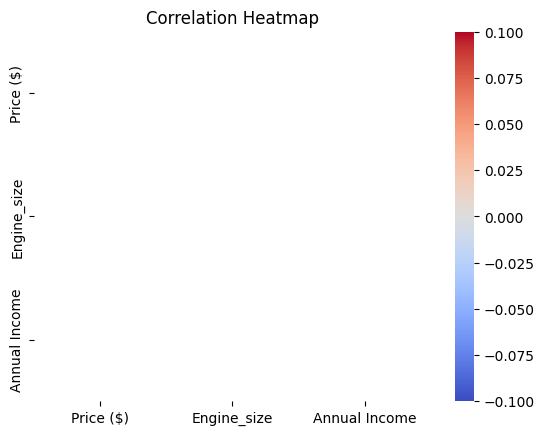

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

15.  How does the average car price vary across different car models and engine types?

In [ ]:
df1 = pd.read_csv('Car Sale.csv')

In [ ]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
df1['Price ($)'] = pd.to_numeric(df1['Price ($)'], errors='coerce')

df1['Engine_size'] = df1['Engine'].apply(lambda x: int(re.search(r"(\d+)", x).group(0)) if isinstance(x, str) and re.search(r"(\d+)", x) else None)

df1 = df1.dropna(subset=['Model', 'Price ($)', 'Engine'])

avg_price_by_model = df1.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

avg_price_by_model = avg_price_by_model.sort_values(by= 'Price ($)', ascending=False)

avg_price_by_model

,Model,Engine,Price ($)
212,SC,Overhead Camshaft,61074.818182
198,Ranger,DoubleÂ Overhead Camshaft,61064.055556
222,Sable,Overhead Camshaft,61039.770833
56,Catera,DoubleÂ Overhead Camshaft,56836.933333
143,LX470,Overhead Camshaft,54037.490196
...,...,...,...
15,A4,Overhead Camshaft,12046.220000
241,Taurus,DoubleÂ Overhead Camshaft,11665.538462
98,Escort,Overhead Camshaft,11403.866667
129,Intrepid,Overhead Camshaft,11069.882353


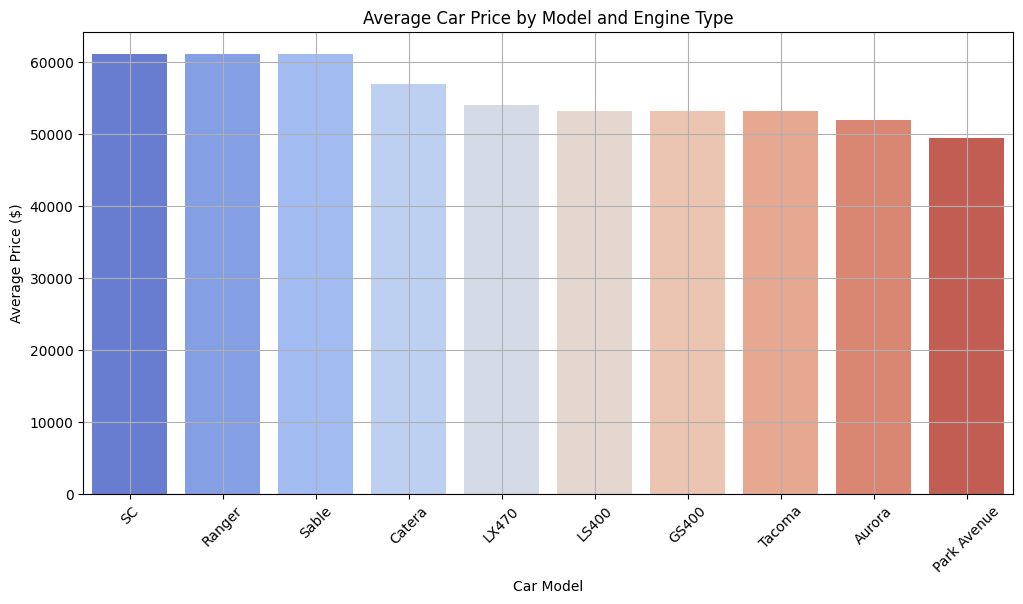

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Model', y='Price ($)', data=avg_price_by_model.head(10), palette='coolwarm')

plt.xlabel('Car Model')
plt.ylabel('Average Price ($)')
plt.title('Average Car Price by Model and Engine Type')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#EDA - 3
#Amazon Sales Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]

Saving amazon.csv to amazon.csv


In [ ]:
df2 = pd.read_csv('amazon.csv')

In [ ]:
df2

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

1. What is the average rating for each product category?

In [ ]:
df2.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [ ]:
df2['rating'] = pd.to_numeric(df2['rating'], errors='coerce')

df2['main_category'] = df2['category'].apply(lambda x: x.split('/')[0])

avg_rating_by_category = df2.groupby('main_category')['rating'].mean().reset_index()

avg_rating_by_category = avg_rating_by_category.sort_values(by='rating', ascending=False)

avg_rating_by_category

,main_category,rating
57,Computers&Accessories|Tablets,4.6
48,Computers&Accessories|NetworkingDevices|Networ...,4.5
62,Electronics|Cameras&Photography|Accessories|Film,4.5
81,Electronics|HomeAudio|MediaStreamingDevices|St...,4.5
196,OfficeProducts|OfficeElectronics|Calculators|B...,4.5
...,...,...
3,Computers&Accessories|Accessories&Peripherals|...,3.6
88,"Electronics|HomeTheater,TV&Video|Accessories|3...",3.5
2,Computers&Accessories|Accessories&Peripherals|...,3.5
14,Computers&Accessories|Accessories&Peripherals|...,3.4


2. What are the top rating_count products by category?

In [ ]:
df2.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'maincategory',
       'main_category'],
      dtype='object')

In [ ]:
df2.dtypes

,0
product_id,object
product_name,object
category,object
discounted_price,object
actual_price,object
discount_percentage,object
rating,float64
rating_count,object
about_product,object
user_id,object


In [ ]:
df2['rating_count'] = pd.to_numeric(df2['rating_count'].astype(str).str.replace(',', ''), errors='coerce')

df2['rating_count'] = df2['rating_count'].fillna(0).astype(int)

df2['main_category'] = df2['category'].apply(lambda x: x.split('/')[0])

top_rating_count_products = df2.loc[df2.groupby('main_category')['rating_count'].idxmax(), ['main_category', 'product_name', 'rating_count', 'rating']]

top_rating_count_products = top_rating_count_products.sort_values(by='rating_count', ascending=False)

top_rating_count_products


,main_category,product_name,rating_count,rating
12,"Electronics|HomeTheater,TV&Video|Accessories|C...",AmazonBasics Flexible Premium HDMI Cable (Blac...,426973,4.4
352,"Electronics|Headphones,Earbuds&Accessories|Hea...",boAt Bassheads 100 in Ear Wired Earphones with...,363713,4.1
370,Electronics|Mobiles&Accessories|Smartphones&Ba...,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",313836,4.1
1028,Home&Kitchen|Kitchen&Dining|KitchenTools|Manua...,Pigeon Polypropylene Mini Handy and Compact Ch...,270563,4.1
588,Computers&Accessories|ExternalDevices&DataStor...,SanDisk Cruzer Blade 32GB USB Flash Drive,253105,4.3
...,...,...,...,...
863,Computers&Accessories|Components|InternalHardD...,"Lapster Caddy for ssd and HDD, Optical Bay 2nd...",362,4.2
1014,Computers&Accessories|Laptops|TraditionalLaptops,"Lenovo IdeaPad 3 11th Gen Intel Core i3 15.6"" ...",323,4.0
557,Electronics|Mobiles&Accessories|MobileAccessor...,LAPSTER 12pcs Spiral Cable Protectors for Char...,305,4.4
269,Electronics|HomeAudio|Speakers|TowerSpeakers,"KRISONS Thunder Speaker, Multimedia Home Theat...",282,3.8


3.  What is the distribution of discounted prices vs. actual prices?

In [ ]:
df2.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'maincategory',
       'main_category'],
      dtype='object')

In [ ]:
df2['discounted_price'].unique()

array(['₹399', '₹199', '₹329', '₹154', '₹149', '₹176.63', '₹229', '₹499',
       '₹299', '₹219', '₹350', '₹159', '₹349', '₹13,999', '₹249',
       '₹13,490', '₹970', '₹279', '₹59', '₹11,499', '₹14,999', '₹179',
       '₹389', '₹599', '₹99', '₹899', '₹32,999', '₹209', '₹19,999',
       '₹999', '₹333', '₹507', '₹309', '₹1,199', '₹799', '₹6,999', '₹230',
       '₹649', '₹15,999', '₹348', '₹32,990', '₹139', '₹263', '₹7,999',
       '₹1,599', '₹26,999', '₹115', '₹10,901', '₹1,434', '₹7,299', '₹325',
       '₹29,999', '₹27,999', '₹30,990', '₹269', '₹24,999', '₹18,990',
       '₹290', '₹345', '₹1,099', '₹719', '₹849', '₹21,999', '₹449',
       '₹37,999', '₹7,390', '₹273.10', '₹15,990', '₹210', '₹1,299',
       '₹347', '₹228', '₹1,499', '₹8,499', '₹20,990', '₹9,999', '₹489',
       '₹23,999', '₹689', '₹1,699', '₹655', '₹749', '₹195', '₹416',
       '₹368', '₹29,990', '₹339', '₹15,490', '₹9,490', '₹637', '₹1,089',
       '₹12,499', '₹1,399', '₹88', '₹57.89', '₹205', '₹949', '₹379',
       '₹8,9

In [ ]:
df2['actual_price'].unique()

array(['₹1,099', '₹349', '₹1,899', '₹699', '₹399', '₹1,000', '₹499',
       '₹299', '₹999', '₹339', '₹799', '₹700', '₹899', '₹24,999',
       '₹21,990', '₹1,799', '₹22,900', '₹199', '₹19,990', '₹19,999',
       '₹1,999', '₹750', '₹599', '₹666.66', '₹1,900', '₹45,999', '₹695',
       '₹34,999', '₹1,599', '₹1,208', '₹475', '₹395', '₹2,199', '₹500',
       '₹2,100', '₹12,999', '₹1,399', '₹21,999', '₹1,499', '₹47,900',
       '₹845', '₹1,400', '₹14,990', '₹2,999', '₹42,999', '₹30,990',
       '₹3,999', '₹249', '₹19,125', '₹1,299', '₹39,999', '₹40,990',
       '₹52,900', '₹800', '₹31,999', '₹1,809', '₹29,999', '₹65,000',
       '₹20,000', '₹23,990', '₹15,999', '₹44,990', '₹44,999', '₹1,700',
       '₹595', '₹27,990', '₹1,200', '₹34,990', '₹1,500', '₹49,990',
       '₹931', '₹2,399', '₹1,339', '₹20,900', '₹15,990', '₹1,600', '₹849',
       '₹1,199', '₹22,990', '₹2,499', '₹47,990', '₹485', '₹18,990',
       '₹11,000', '₹70,900', '₹549', '₹35,999', '₹1,699', '₹31,990',
       '₹9,990', '₹16,99

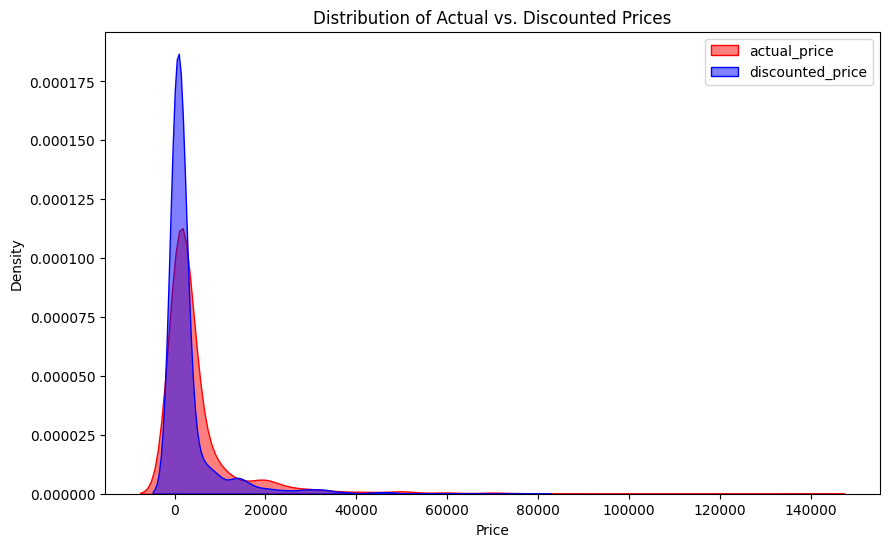

In [ ]:
df2['discounted_price'] = df2['discounted_price'].replace('₹', '', regex=True).str.replace(',', '').astype(float)

df2['actual_price'] = df2['actual_price'].replace('₹', '', regex=True).str.replace(',', '').astype(float)

plt.figure(figsize=(10,6))
sns.kdeplot(df2['actual_price'], label = 'actual_price', fill=True, color='red', alpha=0.5)
sns.kdeplot(df2['discounted_price'], label = 'discounted_price', fill=True, color='blue', alpha=0.5)

plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Actual vs. Discounted Prices')
plt.legend()
plt.show()

4.  How does the average discount percentage vary across categories?

In [ ]:
df2.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'maincategory',
       'main_category'],
      dtype='object')

In [ ]:
df2['discount_percentage'].unique()

array(['64%', '43%', '90%', '53%', '61%', '85%', '65%', '23%', '50%',
       '33%', '55%', '63%', '69%', '60%', '13%', '44%', '38%', '39%',
       '46%', '41%', '70%', '42%', '72%', '25%', '51%', '73%', '0%',
       '80%', '28%', '67%', '58%', '35%', '45%', '62%', '54%', '27%',
       '77%', '56%', '78%', '31%', '86%', '47%', '37%', '75%', '32%',
       '68%', '66%', '22%', '57%', '17%', '52%', '88%', '20%', '59%',
       '40%', '26%', '29%', '83%', '71%', '15%', '76%', '48%', '82%',
       '36%', '89%', '87%', '24%', '34%', '11%', '91%', '7%', '19%',
       '79%', '21%', '81%', '18%', '49%', '30%', '84%', '10%', '6%',
       '14%', '74%', '4%', '5%', '16%', '8%', '2%', '94%', '12%', '3%',
       '9%'], dtype=object)

In [ ]:
df2['discount_percentage'] = df2['discount_percentage'].astype(str).str.replace('%', '').astype(float)

df2['main_category'] = df2['category'].apply(lambda x: x.split('/')[0])

avg_discount_by_category = df2.groupby('main_category')['discount_percentage'].mean().reset_index()

avg_discount_by_category = avg_discount_by_category.sort_values(by='discount_percentage', ascending=False)

avg_discount_by_category

,main_category,discount_percentage
106,Electronics|Mobiles&Accessories|MobileAccessor...,90.0
6,Computers&Accessories|Accessories&Peripherals|...,90.0
75,"Electronics|Headphones,Earbuds&Accessories|Ear...",90.0
73,"Electronics|Headphones,Earbuds&Accessories|Ada...",88.0
14,Computers&Accessories|Accessories&Peripherals|...,87.5
...,...,...
196,OfficeProducts|OfficeElectronics|Calculators|B...,0.0
176,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,0.0
81,Electronics|HomeAudio|MediaStreamingDevices|St...,0.0
62,Electronics|Cameras&Photography|Accessories|Film,0.0


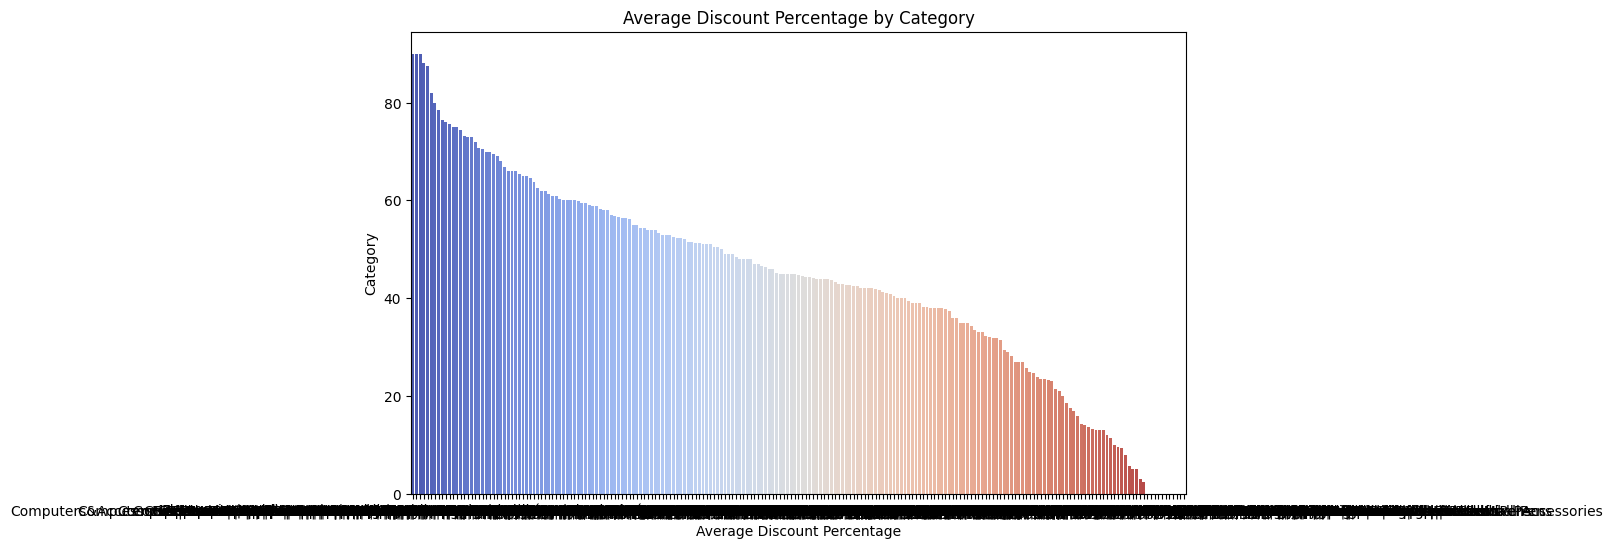

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='main_category', y='discount_percentage', data=avg_discount_by_category, palette='coolwarm')
plt.xlabel('Average Discount Percentage')
plt.ylabel('Category')
plt.title('Average Discount Percentage by Category')
plt.show()

5. What are the most popular product names?

In [ ]:
df2.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'maincategory',
       'main_category'],
      dtype='object')

In [ ]:
popular_products = df2['product_name'].value_counts().reset_index()
popular_products.columns = ['product_name', 'count']

top_products_names = popular_products.head(10)
top_products_names


,product_name,count
0,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",5
1,Fire-Boltt Phoenix Smart Watch with Bluetooth ...,4
2,Wayona Nylon Braided USB to Lightning Fast Cha...,3
3,MI Braided USB Type-C Cable for Charging Adapt...,3
4,Amazonbasics Nylon Braided Usb-C To Lightning ...,3
5,"Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB ...",3
6,Amazon Basics USB Type-C to USB-A 2.0 Male Fas...,3
7,boAt A400 USB Type-C to USB-A 2.0 Male Data Ca...,3
8,Duracell USB C To Lightning Apple Certified (M...,3
9,AmazonBasics New Release Nylon USB-A to Lightn...,3


6. What are the most popular product keywords?

In [ ]:
df2.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'maincategory',
       'main_category'],
      dtype='object')

In [ ]:
from ast import keyword
from sklearn.feature_extraction.text import TfidfVectorizer

df2['product_name'] = df2['product_name'].astype(str).str.lower()

vectorize = TfidfVectorizer(stop_words='english', max_features = 20)
tfidf_matrix = vectorize.fit_transform(df2['product_name'])

keywords = vectorize.get_feature_names_out()

keyword_count = tfidf_matrix.toarray().sum(axis = 0)

keyword_df2 = pd.DataFrame({'keyword': keywords, 'Importance': keyword_count})

top_keyword = keyword_df2.sort_values(by='Importance', ascending=False).head(10)

top_keyword

,keyword,Importance
1,black,282.417018
16,usb,164.945569
3,cable,150.872504
18,white,113.636220
15,type,90.000534
13,smart,88.128803
4,charging,87.176305
7,fast,78.278809
8,hd,73.707597
19,wireless,69.131036


7.  What are the most popular product reviews

In [ ]:
df2.columns


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'maincategory',
       'main_category'],
      dtype='object')

In [ ]:
df2['rating_count'].unique()

array([24269, 43994,  7928, ...,   468,  8031,  6987])

In [ ]:
df2['rating_count'] = df2['rating_count'].astype(str).str.replace(',', '').astype(int)

popular_reviews = df2[['review_title', 'review_content','rating_count']].sort_values(by='rating_count', ascending=False).head(10)
popular_reviews

,review_title,review_content,rating_count
12,"It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,426973
65,"It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,426973
47,"It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,426973
684,"It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,426972
400,"Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...,363713
352,"Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...,363713
584,"Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...,363711
370,"Best phone for below normal use,Good mobile fo...",If you want a smart phone for just the use of ...,313836
371,"Best phone for below normal use,Good mobile fo...",If you want a smart phone for just the use of ...,313836
473,"Best phone for below normal use,Good mobile fo...",If you want a smart phone for just the use of ...,313832


In [ ]:
review_counts = df2['review_content'].value_counts().reset_index()
review_counts.columns = ['review_content', 'count']

top_reviews = review_counts.head(10)
top_reviews

,review_content,count
0,"I am not big on camera usage, personally. I wa...",8
1,Worked on iPhone 7 and didn’t work on iPhone X...,7
2,I ordered this cable to connect my phone to An...,7
3,"Good product,long wire,Charges good,Nice,I bou...",7
4,128GB SD Card is showing 134GBDon't buy this p...,6
5,I purchased the 6/128gb variant.To sum it up ...,6
6,"Everything is fine but it is bulky and hard, i...",5
7,Good budget mfi certified lightly cable for th...,5
8,About the TV - Wonderful----------------------...,5
9,[Update: Sept 29] boAt seems to have heard the...,5


8.  What is the correlation between discounted_price and rating?

In [ ]:
df2.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'maincategory',
       'main_category'],
      dtype='object')

In [ ]:
df2['discounted_price'] = df2['discounted_price'].astype(str).str.replace('₹', '', regex=True).str.replace(',', '').astype(float)

df2['rating'] = pd.to_numeric(df2['rating'], errors='coerce')

correlation_discounted_price_rating = df2['discounted_price'].corr(df2['rating'])

correlation_discounted_price_rating

0.12033741712288548

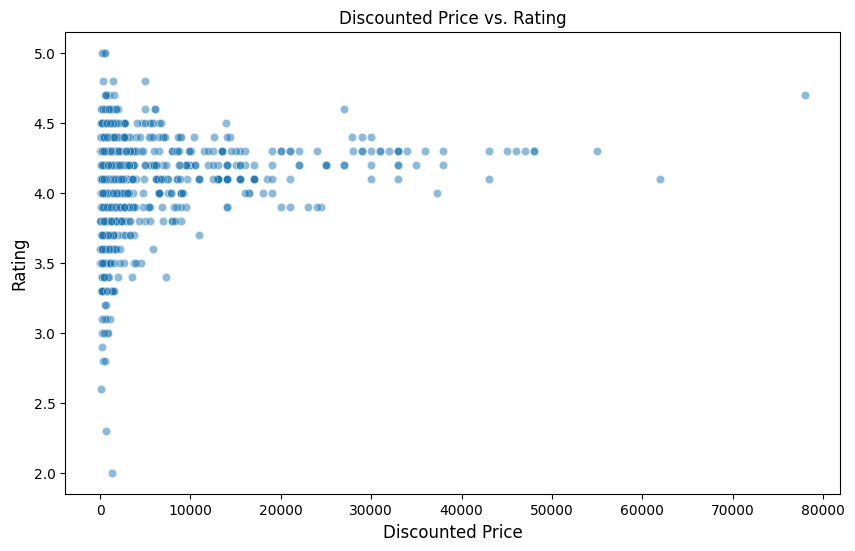

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='discounted_price', y='rating', data=df2, alpha=0.5)
plt.xlabel('Discounted Price', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.title('Discounted Price vs. Rating')
plt.show()


9.  What are the Top 5 categories based on the highest ratings

In [ ]:
df2.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'maincategory',
       'main_category'],
      dtype='object')

In [ ]:
df2['rating'] = pd.to_numeric(df2['rating'], errors='coerce')

avg_rating_by_category = df2.groupby('category')['rating'].mean().reset_index()
top_categories = avg_rating_by_category.sort_values(by='rating', ascending=False).head(5)

top_categories

,category,rating
57,Computers&Accessories|Tablets,4.6
48,Computers&Accessories|NetworkingDevices|Networ...,4.5
62,Electronics|Cameras&Photography|Accessories|Film,4.5
81,Electronics|HomeAudio|MediaStreamingDevices|St...,4.5
196,OfficeProducts|OfficeElectronics|Calculators|B...,4.5


10.  Identify any potential areas for improvement or optimization based on the data analysis

In [ ]:
df2.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'maincategory',
       'main_category'],
      dtype='object')

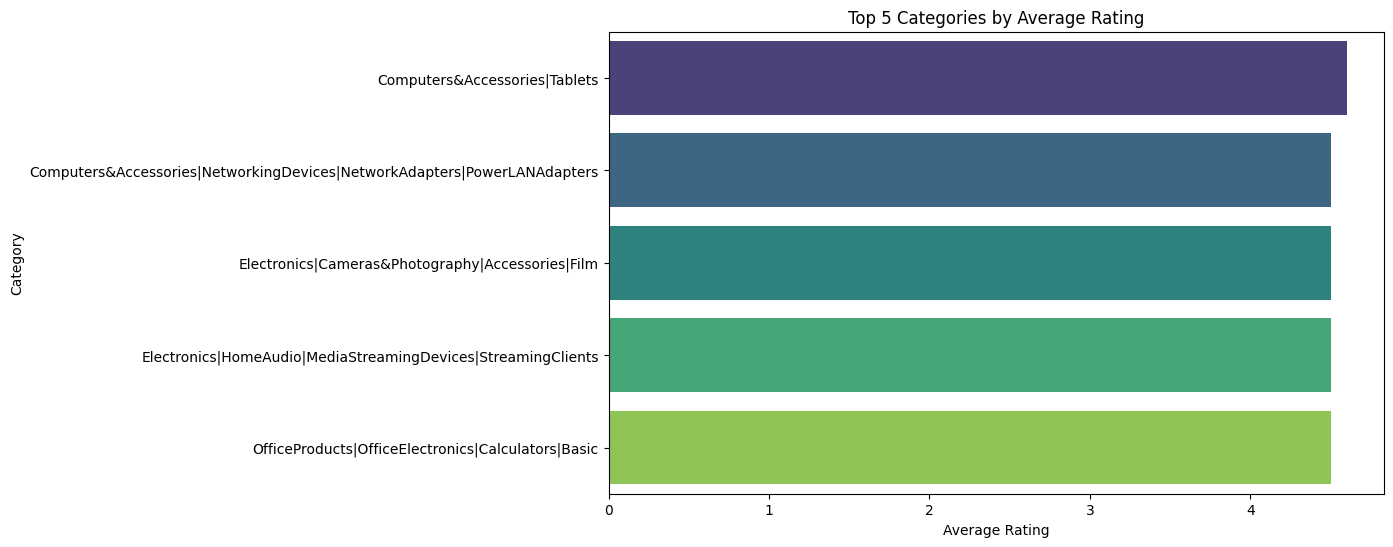

In [ ]:
df2['discounted_price'] = df2['discounted_price'].astype(str).str.replace('₹', '', regex=True).str.replace(',', '').astype(float)

df2['rating'] = pd.to_numeric(df2['rating'], errors='coerce')

df2['rating_count'] = df2['rating_count'].astype(str).str.replace(',', '').astype(int)

#Top 5 categories by rating

category_avg_rating = df2.groupby('category')['rating'].mean().reset_index()
top_5_categories = category_avg_rating.sort_values(by='rating', ascending=False).head(5)

plt.figure(figsize=(10,6))
sns.barplot(x='rating', y='category', data=top_5_categories, palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.title('Top 5 Categories by Average Rating')
plt.show()

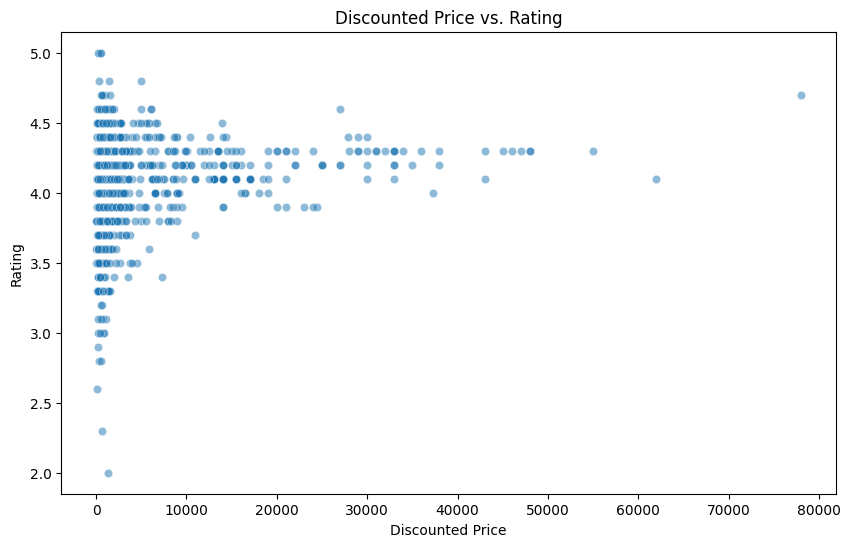

In [ ]:
#price vs rating

plt.figure(figsize=(10,6))
sns.scatterplot(x='discounted_price', y='rating', data=df2, alpha=0.5)
plt.title('Discounted Price vs. Rating')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.show()

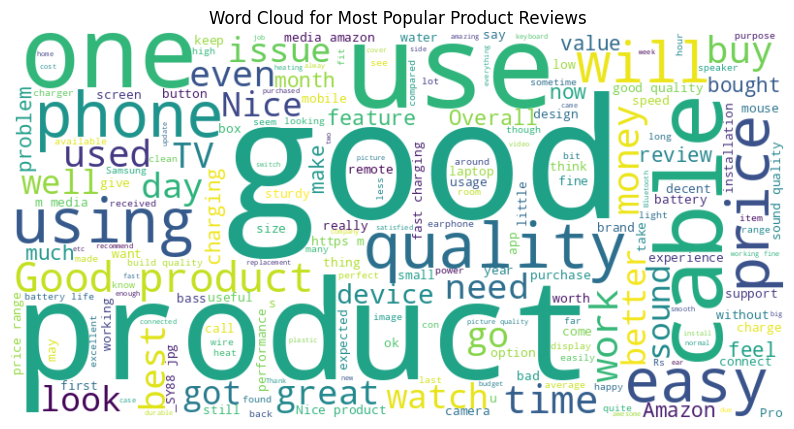

In [ ]:
!pip install wordcloud
#word count for most popular product reviews
from wordcloud import WordCloud

review_text = " ".join(df2['review_content'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(review_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Most Popular Product Reviews')
plt.show()

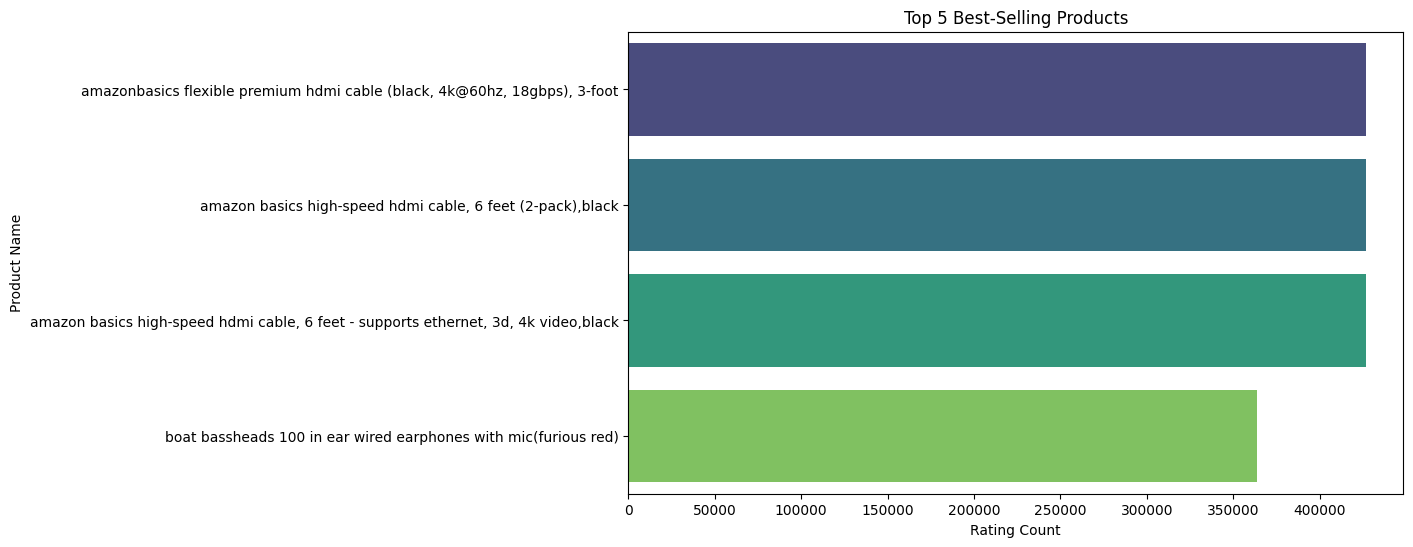

In [ ]:
#top 5 best-selling products

top_products = df2.sort_values(by='rating_count', ascending=False).head(5)

plt.figure(figsize=(10,6))
sns.barplot(x='rating_count', y='product_name', data=top_products, palette='viridis')
plt.xlabel('Rating Count')
plt.ylabel('Product Name')
plt.title('Top 5 Best-Selling Products')
plt.show()

#EDA - 4
#Spotify

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]

Saving spotify.csv to spotify (1).csv


In [ ]:
df3 = pd.read_csv('spotify.csv')

In [ ]:
df3

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful

In [ ]:
df3 = pd.read_csv('spotify.csv')

In [ ]:
df3

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [ ]:
df3.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [ ]:
df3.dropna(inplace=True)

In [ ]:
df3.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [ ]:
df3.duplicated().sum()

27

In [ ]:
df3.drop_duplicates(inplace=True)

In [ ]:
df3.shape

(413, 5)

2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

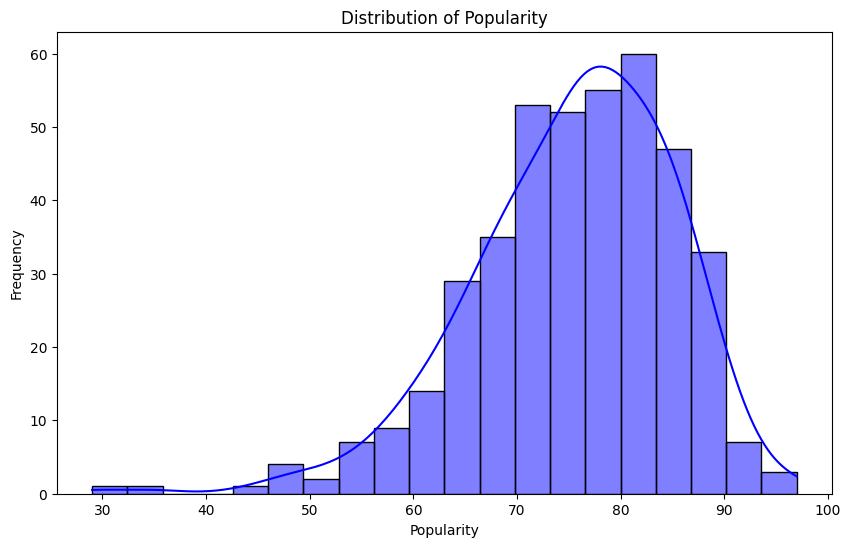

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df3['Popularity'], bins=20, kde=True, color='blue')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity')
plt.show()

3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

In [ ]:
df3.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

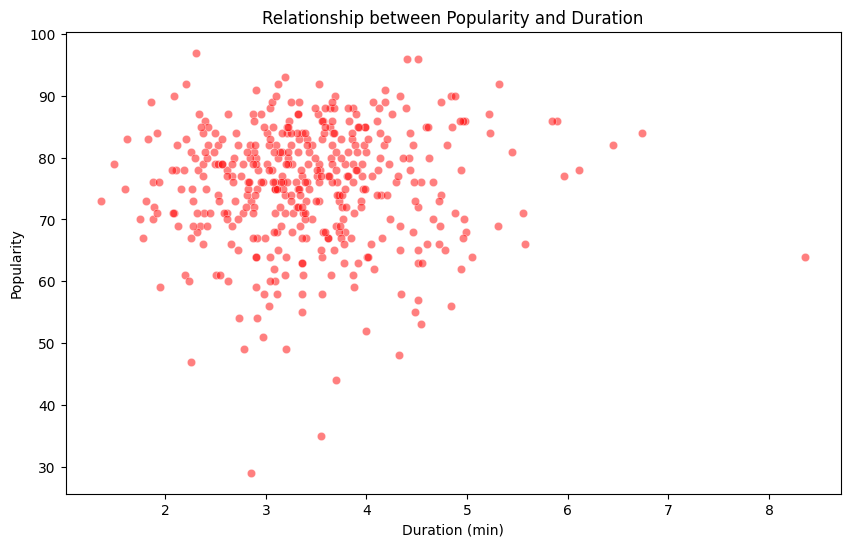

In [ ]:
df3['Duration (min)'] = df3['Duration (ms)'].apply(lambda x: x/60000)

plt.figure(figsize=(10,6))
sns.scatterplot(x='Duration (min)', y='Popularity', data=df3, alpha=0.5, color='red')
plt.xlabel('Duration (min)')
plt.ylabel('Popularity')
plt.title('Relationship between Popularity and Duration')
plt.show()

In [ ]:
#Insights:
#If the dots are all over the place, there's no stronng link between how long a song is and how popular it gets.


4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

In [ ]:
df3.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID',
       'Duration (min)'],
      dtype='object')

In [ ]:
df3['Artist'].unique()

array(['Drake', 'Travis Scott', 'Post Malone', 'Noah Kahan',
       'Nicki Minaj', 'Justin Bieber', 'Jessie J', 'KAROL G', '21 Savage',
       'Metro Boomin', 'SZA', 'Jack Harlow', 'Jung Kook', 'Lil Nas X',
       'Lyrical Lemonade', 'Future', 'Don Toliver', 'Lil Wayne', 'Yeat',
       'Eminem', 'Kendrick Lamar', 'Baby Keem', 'The Weeknd', 'JAY-Z',
       'Cardi B', 'Bruno Mars', 'Ed Sheeran', 'GloRilla', 'Gunna',
       'Lil Baby', 'Internet Money', 'Sarz', 'J. Cole', 'Lil Durk',
       'cassö', 'D-Block Europe', 'Clavish', 'Latto', 'Young Nudy',
       'Megan Thee Stallion', 'NEIKED', 'Snoop Dogg', 'Dr. Dre',
       'benny blanco', 'Young Thug', 'Chris Brown', 'Dave', 'Central Cee',
       'The Kid LAROI', 'Quevedo', 'Bizarrap', 'Anuel AA', 'SAIKO',
       'David Guetta', 'Coi Leray', 'Pressa', 'Fivio Foreign', 'RAYE',
       'French Montana', 'Arizona Zervas', 'Pharrell Williams',
       'XXXTENTACION', 'Kane Brown', 'Ellie Goulding', 'Reneé Rapp',
       'Maroon 5', 'DJ Snake', 'Qu

In [ ]:
artist_counts = df3['Artist'].value_counts()
top_artist = artist_counts.idxmax()
top_artist

'Drake'

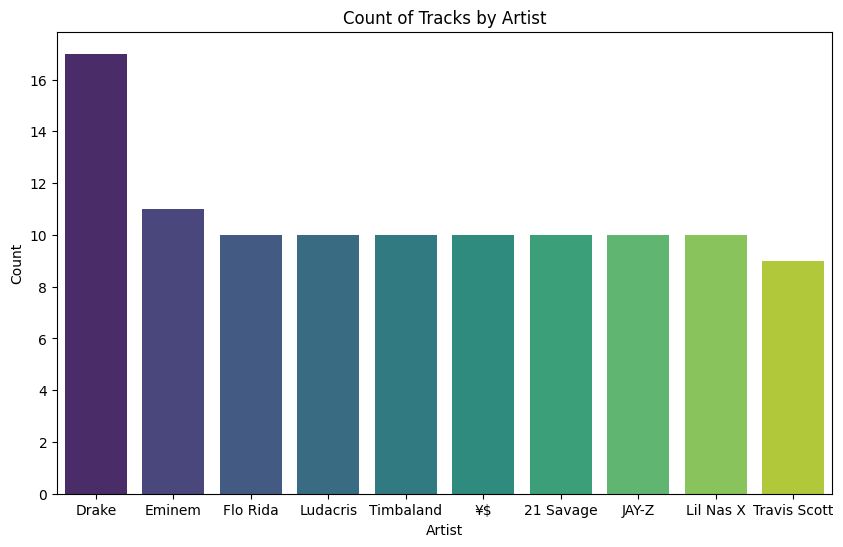

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Artist', data=df3, order=artist_counts.index[:10], palette='viridis')
plt.xlabel('Artist')
plt.ylabel('Count')
plt.title('Count of Tracks by Artist')
plt.show()

5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [ ]:
df3.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID',
       'Duration (min)'],
      dtype='object')

In [ ]:
least_popular_tracks= df3[['Artist','Track Name', 'Popularity']].sort_values(by='Popularity', ascending=True).head(5)
least_popular_tracks

,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


6.  Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

In [ ]:
df3.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID',
       'Duration (min)'],
      dtype='object')

In [ ]:
artist_avg_popularity = df3.groupby('Artist')['Popularity'].mean().reset_index()

top_5_artists = artist_avg_popularity.sort_values(by='Popularity', ascending=False).head(5)

top_5_artists

,Artist,Popularity
113,cassö,92.000000
104,Trueno,89.000000
24,David Guetta,87.000000
103,Travis Scott,86.555556
114,¥$,85.100000


7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

In [ ]:
df3.columns


Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID',
       'Duration (min)'],
      dtype='object')

In [ ]:
top_tracks = df3.loc[df3.groupby('Artist')['Popularity'].idxmax(), ['Artist', 'Track Name', 'Popularity']]

top_5_artists= top_tracks.sort_values(by='Popularity', ascending=False).head(5)

top_5_artists

,Artist,Track Name,Popularity
40,Jack Harlow,Lovin On Me,97
260,¥$,CARNIVAL,96
70,21 Savage,redrum,96
30,Travis Scott,FE!N (feat. Playboi Carti),93
140,cassö,Prada,92


8. Visualize relationships between multiple numerical variables simultaneously using a pair plot

In [ ]:
df3.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID',
       'Duration (min)'],
      dtype='object')

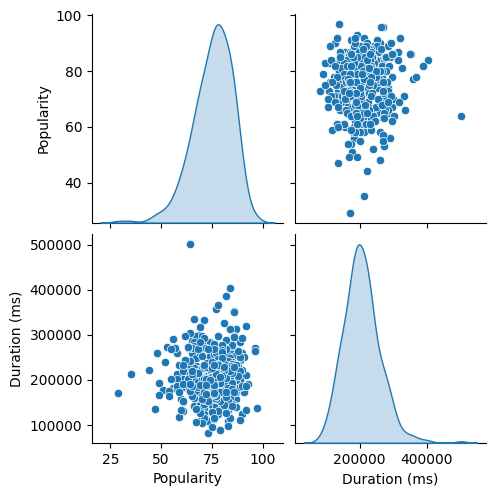

In [ ]:
numerical_columns = ['Popularity', 'Duration (ms)']
sns.pairplot(df3[numerical_columns], diag_kind='kde')
plt.show()

9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

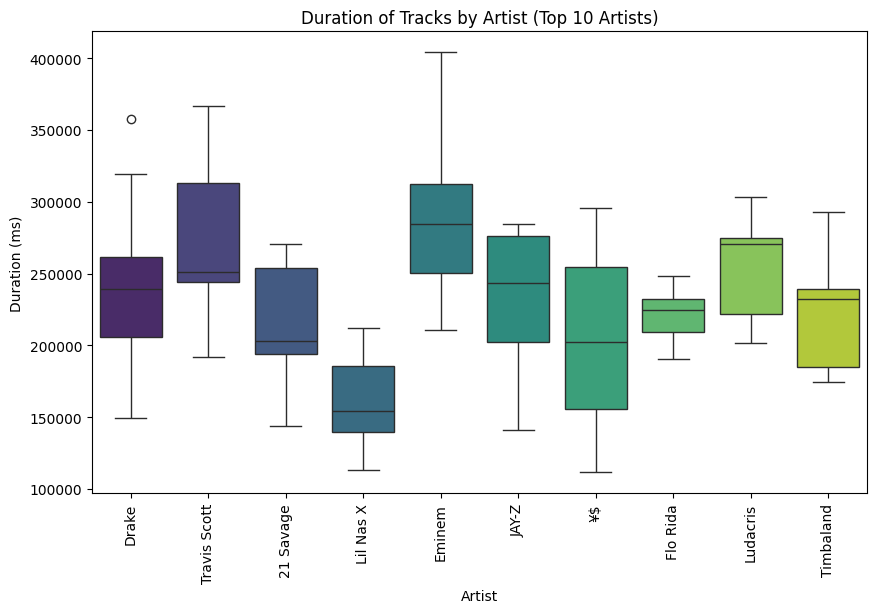

In [ ]:
top_10_artists = df3['Artist'].value_counts().head(10)

top_10_artists = df3[df3['Artist'].isin(top_10_artists.index)]

plt.figure(figsize=(10,6))
sns.boxplot(x='Artist', y='Duration (ms)', data=top_10_artists, palette='viridis')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.title('Duration of Tracks by Artist (Top 10 Artists)')
plt.xticks(rotation=90)
plt.show()

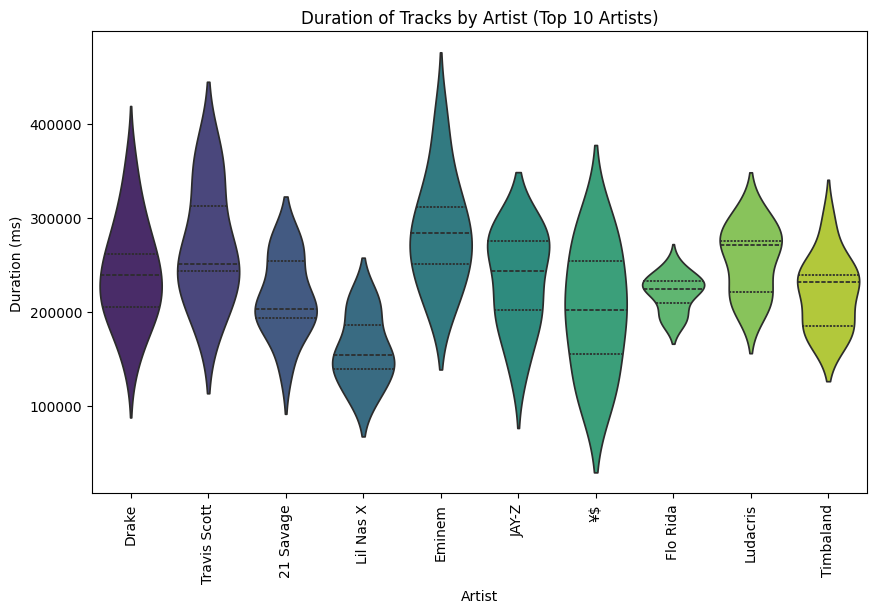

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Artist', y='Duration (ms)', data=top_10_artists, palette='viridis', inner='quartile')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.title('Duration of Tracks by Artist (Top 10 Artists)')
plt.xticks(rotation=90)
plt.show()

10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

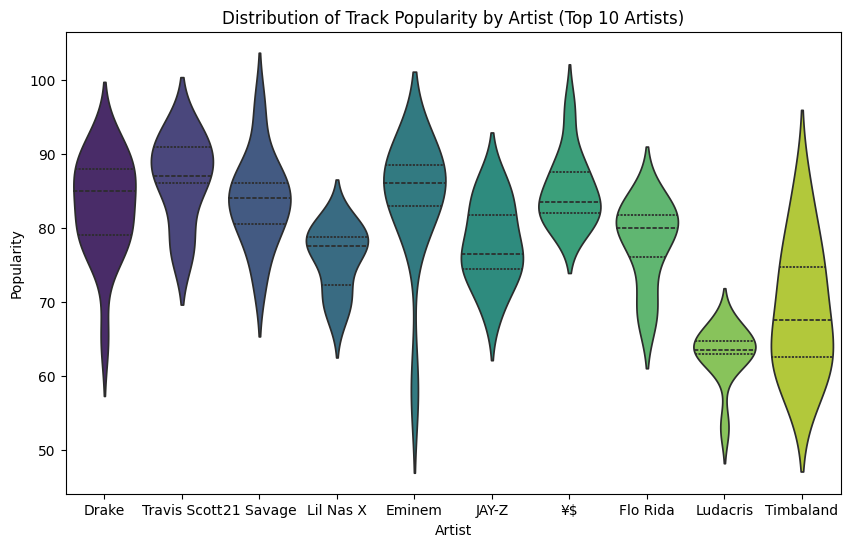

In [ ]:
top_10_artists=df3['Artist'].value_counts().head(10).index
filtered_df = df3[df3['Artist'].isin(top_10_artists)]

plt.figure(figsize=(10,6))
sns.violinplot(x='Artist', y='Popularity', data=filtered_df, palette='viridis', inner='quartile')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.title('Distribution of Track Popularity by Artist (Top 10 Artists)')
plt

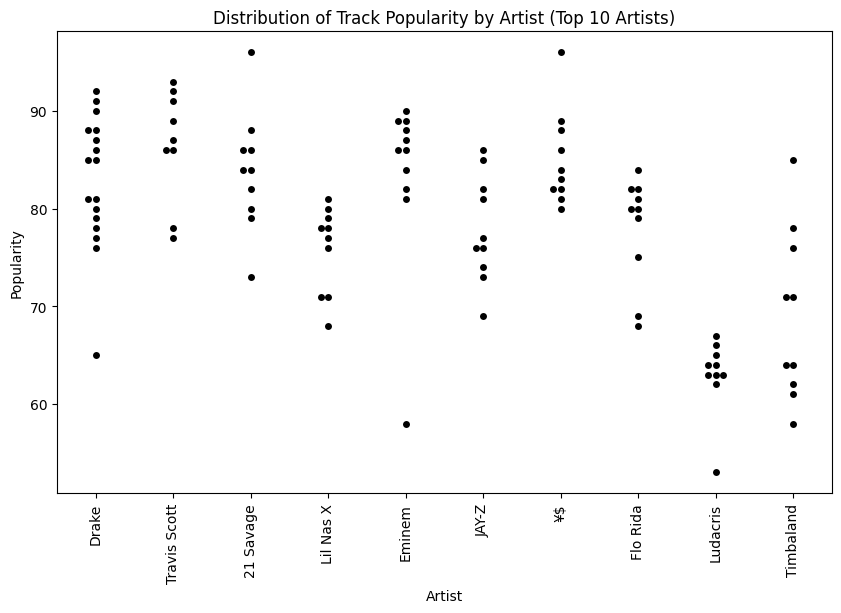

In [ ]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='Artist', y='Popularity', data=filtered_df, color='black')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.title('Distribution of Track Popularity by Artist (Top 10 Artists)')
plt.xticks(rotation=90)
plt.show()